# Setup and Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install openpyxl

In [3]:
!pip install xlsxwriter

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import pandas as pd
import tensorflow as tf
import cv2
import xlsxwriter
import pywt

from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [5]:
!unzip "/content/Copy of db0_ODA_cnn_gru.zip" -d model_0
!unzip "/content/Copy of db1_ODA_cnn_lstm.zip" -d model_1
!unzip "/content/Copy of db2-1_ODA_cnn_lstm.zip" -d model_2-1
!unzip "/content/Copy of db2-2_ODA_cnn.zip" -d model_2-2
!unzip "/content/Copy of db3-1-1_ODA_cnn.zip" -d model_3-1-1
!unzip "/content/Copy of db3-1-2_ODA_cnn.zip" -d model_3-1-2
!unzip "/content/Copy of db3-2-1_ODA_cnn.zip" -d model_3-2-1
!unzip "/content/Copy of db3-2-2_ODA_cnn_gru.zip" -d model_3-2-2
!unzip "/content/Copy of db3-3-1_ODA_cnn.zip" -d model_3-3-1
!unzip "/content/Copy of db3-3-2_ODA_cnn.zip" -d model_3-3-2
!unzip "/content/Copy of db3-4-1_ODA_cnn_gru.zip" -d model_3-4-1
!unzip "/content/Copy of db3-4-2_ODA_cnn_lstm.zip" -d model_3-4-2
!unzip "/content/Copy of db4-1_ODA_cnn.zip" -d model_4-1
!unzip "/content/Copy of db4-2_ODA_cnn_gru.zip" -d model_4-2
!unzip "/content/Copy of db5-1-1_ODA_cnn_lstm.zip" -d model_5-1-1
!unzip "/content/Copy of db5-1-2_ODA_cnn_lstm.zip" -d model_5-1-2
!unzip "/content/Copy of db5-2-1_ODA_cnn_lstm.zip" -d model_5-2-1
!unzip "/content/Copy of db5-2-2_ODA_cnn.zip" -d model_5-2-2
!unzip "/content/Copy of db5-3-1_ODA_cnn_lstm.zip" -d model_5-3-1
!unzip "/content/Copy of db5-3-2_ODA_cnn_lstm.zip" -d model_5-3-2
!unzip "/content/Copy of db5-4-1_ODA_cnn_lstm.zip" -d model_5-4-1
!unzip "/content/Copy of db5-4-2_ODA_cnn.zip" -d model_5-4-2

Archive:  /content/Copy of db0_ODA_cnn_gru.zip
replace model_0/content/model/saved_model.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/Copy of db1_ODA_cnn_lstm.zip
replace model_1/content/model/saved_model.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/Copy of db2-1_ODA_cnn_lstm.zip
replace model_2-1/content/model/saved_model.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/Copy of db2-2_ODA_cnn.zip
replace model_2-2/content/model/keras_metadata.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/Copy of db3-1-1_ODA_cnn.zip
replace model_3-1-1/content/model/keras_metadata.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/Copy of db3-1-2_ODA_cnn.zip
replace model_3-1-2/content/model/keras_metadata.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/Copy of db3-2-1_ODA_cnn.zip
replace model_3-2-1/content/model/keras_metadata.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/Copy of db3-2-2_ODA_cnn_gru.zi

# Define functions

In [1]:
# rmspe metric
def rmspe(y_true, y_pred):
    return 100 * K.sqrt(K.mean(K.square((y_true - y_pred) / y_true)))

In [2]:
# smape metric
def smape(y_true, y_pred):
    return 100 * K.mean(K.abs((y_pred - y_true)) / (K.abs(y_true) + K.abs(y_pred)))

In [3]:
# create model
def create_model(model_type, n_steps, n_features, output_AF):
  model = Sequential()
  if(model_type == 0):
    model.add(Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(n_steps, n_features)))
    model.add(Conv1D(filters=128, kernel_size=1, activation="relu", input_shape=(n_steps, n_features)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
  if(model_type == 1):
    model.add(Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(n_steps, n_features)))
    model.add(GRU(128, input_shape=(n_steps, n_features)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
  if(model_type == 2):
    model.add(Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(n_steps, n_features)))
    model.add(LSTM(128, input_shape=(n_steps, n_features)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
  if(model_type == 3):
    model.add(GRU(64, input_shape=(n_steps, n_features)))
    model.add(GRU(128, input_shape=(n_steps, n_features)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
  if(output_AF == 1):
    model.add(Dense(1, activation='sigmoid'))
  elif(output_AF == 2):
    model.add(Dense(1, activation='tanh'))
  else:
    model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', tf.keras.metrics.RootMeanSquaredError(name='rmse'), rmspe, 'mape', smape])
  return model

In [4]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix >= len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [5]:
# predict all
def predict_all(model, X_test):
  preds = list()
  for x in X_test:
    x = x.reshape((1, n_steps, n_features))
    preds.extend(model.predict(x, verbose=0)[0])
  return preds

In [6]:
# evaluate model
def get_metrics(truth, preds):
  mse_score = tf.keras.metrics.mean_squared_error(truth, preds)
  mae_score = tf.keras.metrics.mean_absolute_error(truth, preds)
  rmse_score = tf.keras.metrics.RootMeanSquaredError()
  rmse_score.update_state(truth, preds)
  rmspe_score = rmspe(truth, preds)
  mape_score = tf.keras.metrics.mean_absolute_percentage_error(truth, preds)
  smape_score = smape(truth, preds)
  return [mse_score.numpy(), mae_score.numpy(), rmse_score.result().numpy(), rmspe_score.numpy(), mape_score.numpy(), smape_score.numpy()]

In [7]:
def plot_train_results(history):
  plt.title('MSE')
  plt.plot(history.history['mse'])
  plt.legend(['MSE'])
  plt.xlabel('Epoch')
  plt.ylabel('LC units (normalized)')
  plt.show()

  plt.title('MAE')
  plt.plot(history.history['mae'])
  plt.legend(['MAE'])
  plt.xlabel('Epoch')
  plt.ylabel('LC units (normalized)')
  plt.show()

  plt.title('RMSE')
  plt.plot(history.history['rmse'])
  plt.legend(['RMSE'])
  plt.xlabel('Epoch')
  plt.ylabel('LC units (normalized)')
  plt.show()

  plt.title('RMSPE')
  plt.plot(history.history['rmspe'])
  plt.legend(['RMSPE'])
  plt.xlabel('Epoch')
  plt.ylabel('Percent (%)')
  plt.show()

  plt.title('MAPE')
  plt.plot(history.history['mape'])
  plt.legend(['MAPE'])
  plt.xlabel('Epoch')
  plt.ylabel('Percent (%)')
  plt.show()

  plt.title('SMAPE')
  plt.plot(history.history['smape'])
  plt.legend(['SMAPE'])
  plt.xlabel('Epoch')
  plt.ylabel('Percent (%)')
  plt.show()

In [8]:
def get_wave(data, wavelet, num_level, mode):
  return pywt.wavedec(data, wavelet, level = num_level, mode = mode)

In [9]:
def inverse_wt(preds_cA_wt, preds_cD_wt, wavelet, mode):
  preds_wt = (np.array(preds_cA_wt), np.array(preds_cD_wt))
  return (pywt.waverec(preds_wt, wavelet, mode))

In [10]:
def process_data(data, n_steps):
  # convert to [rows, columns] structure
  for idx, item in enumerate(data):
    data[idx] = item.reshape((len(item), 1))
  # horizontally stack columns
  dataset = hstack(data)
  # convert into input/output
  X, y = split_sequences(dataset, n_steps)
  print(X.shape, y.shape)
  # return
  return X, y

# Set parameters

In [11]:
#Select model
#0 = CNN; 1 = CNN/GRU; 2 = CNN/LSTM
model_type = 2

In [12]:
# choose a number of time steps
n_steps = 7

In [15]:
# create scaler
scaler = MinMaxScaler()

In [16]:
result_list = []

In [17]:
# Output AF
output_AF = 1

In [18]:
num_epoch = 2000

In [23]:
model_0 = tf.keras.models.load_model("model_0/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_1 = tf.keras.models.load_model("model_1/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_2_1 = tf.keras.models.load_model("model_2-1/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_2_2 = tf.keras.models.load_model("model_2-2/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_3_1_1 = tf.keras.models.load_model("model_3-1-1/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_3_1_2 = tf.keras.models.load_model("model_3-1-2/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_3_2_1 = tf.keras.models.load_model("model_3-2-1/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_3_2_2 = tf.keras.models.load_model("model_3-2-2/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_3_3_1 = tf.keras.models.load_model("model_3-3-1/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_3_3_2 = tf.keras.models.load_model("model_3-3-2/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_3_4_1 = tf.keras.models.load_model("model_3-4-1/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_3_4_2 = tf.keras.models.load_model("model_3-4-2/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_4_1 = tf.keras.models.load_model("model_4-1/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_4_2 = tf.keras.models.load_model("model_4-2/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_5_1_1 = tf.keras.models.load_model("model_5-1-1/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_5_1_2 = tf.keras.models.load_model("model_5-1-2/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_5_2_1 = tf.keras.models.load_model("model_5-2-1/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_5_2_2 = tf.keras.models.load_model("model_5-2-2/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_5_3_1 = tf.keras.models.load_model("model_5-3-1/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_5_3_2 = tf.keras.models.load_model("model_5-3-2/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_5_4_1 = tf.keras.models.load_model("model_5-4-1/content/model", custom_objects={"rmspe": rmspe, "smape": smape})
model_5_4_2 = tf.keras.models.load_model("model_5-4-2/content/model", custom_objects={"rmspe": rmspe, "smape": smape})

In [24]:
models = [model_0, model_1, model_2_1, model_2_2, model_3_1_1, model_3_1_2, model_3_2_1, model_3_2_2, model_3_3_1, model_3_3_2, model_3_4_1, model_3_4_2, model_4_1, model_4_2, model_5_1_1, model_5_1_2, model_5_2_1, model_5_2_2, model_5_3_1, model_5_3_2, model_5_4_1, model_5_4_2]
nums = ["0", "1", "2-1", "2-2", "3-1-1", "3-1-2", "3-2-1", "3-2-2", "3-3-1", "3-3-2", "3-4-1", "3-4-2", "4-1", "4-2", "5-1-1", "5-1-2", "5-2-1", "5-2-2", "5-3-1", "5-3-2", "5-4-1", "5-4-2"]

# ***DB0***

## Data

### Get data

In [24]:
num = nums[0]

In [25]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

lc = pd.Series(sheet.loc[:,"LC"]).array

print(lc)

<PandasArray>
[3.65047827854631e-05, 3.78712167450439e-05, 3.82285383350952e-05,
 3.91848489187851e-05, 9.11372096614223e-05, 4.07982877855985e-05,
 4.16810933765463e-05, 6.58344640965869e-05, 4.34628292952584e-05,
  0.00013453352162387,
 ...
   0.0001218016460388, 4.03191099120625e-05, 9.95221815552966e-06,
 1.23635787063641e-05, 6.01403356579085e-05, 0.000121505413651136,
 9.66506180038638e-05,  9.7826250593757e-05, 1.40574734822269e-05,
 4.21150780295784e-05]
Length: 485, dtype: float64


In [26]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[0.0002663224004209042, 0.0002667767403181642, 0.0002702667843550444,
 0.0002657578443177044,  0.000269292009761557, 0.0002664439962245524,
 0.0002851577592082322, 0.0002817261556629092, 0.0002792975574266165,
 0.0002741963253356516, 0.0002754584420472383, 0.0002755770983640105,
  0.000260386586887762, 0.0002824406255967915,  0.000276621023658663,
 0.0002534000086598098, 0.0002633638214319944, 0.0002316768659511581,
 0.0001825935469241813, 4.014893420389853e-05, 5.965049786027521e-05,
 0.0001700739376246929, 0.0001833833375712857, 0.0001656110543990508,
 0.0001794994313968346, 0.0001955566258402541, 0.0002007631555898115,
 0.0002315033198101446, 0.0001426918897777796, 0.0001629334292374551,
 9.097010479308665e-05, 4.810225073015317e-05,  0.000112723748316057,
 0.0001495699398219585, 0.0001497877528890967,  0.000177653317223303,
  0.000174438624526374, 0.0001838714233599603, 0.0001934077736223117,
 0.0001932752638822421, 0.0002102486614603549, 0.0002149258507415652,
 0.000

In [27]:
len(lc_pred)

97

In [28]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [29]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [30]:
data = [lc_merged, lc]

### Normalize data

In [31]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [32]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(478, 7, 1) (478,)
[[0.11613806]
 [0.12083573]
 [0.12206416]
 [0.12535186]
 [0.30395899]
 [0.13089871]
 [0.13393371]] 0.2169706314988369
[[0.12083573]
 [0.12206416]
 [0.12535186]
 [0.30395899]
 [0.13089871]
 [0.13393371]
 [0.21697063]] 0.14005914167032327
[[0.12206416]
 [0.12535186]
 [0.30395899]
 [0.13089871]
 [0.13393371]
 [0.21697063]
 [0.14005914]] 0.45315126430285263
[[0.12535186]
 [0.30395899]
 [0.13089871]
 [0.13393371]
 [0.21697063]
 [0.14005914]
 [0.45315126]] 0.4204434040032089
[[0.30395899]
 [0.13089871]
 [0.13393371]
 [0.21697063]
 [0.14005914]
 [0.45315126]
 [0.4204434 ]] 0.47354876014706165
[[0.13089871]
 [0.13393371]
 [0.21697063]
 [0.14005914]
 [0.45315126]
 [0.4204434 ]
 [0.47354876]] 0.4266950672090822
[[0.13393371]
 [0.21697063]
 [0.14005914]
 [0.45315126]
 [0.4204434 ]
 [0.47354876]
 [0.42669507]] 0.5021379632134407
[[0.21697063]
 [0.14005914]
 [0.45315126]
 [0.4204434 ]
 [0.47354876]
 [0.42669507]
 [0.50213796]] 0.540687914772234
[[0.14005914]
 [0.45315126]
 [0.420

In [33]:
X[1][-1]

array([0.21697063])

In [34]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

382


In [35]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.11613806]
 [0.12083573]
 [0.12206416]
 [0.12535186]
 [0.30395899]
 [0.13089871]
 [0.13393371]] 0.2169706314988369
[[0.12083573]
 [0.12206416]
 [0.12535186]
 [0.30395899]
 [0.13089871]
 [0.13393371]
 [0.21697063]] 0.14005914167032327
[[0.12206416]
 [0.12535186]
 [0.30395899]
 [0.13089871]
 [0.13393371]
 [0.21697063]
 [0.14005914]] 0.45315126430285263
[[0.12535186]
 [0.30395899]
 [0.13089871]
 [0.13393371]
 [0.21697063]
 [0.14005914]
 [0.45315126]] 0.4204434040032089
[[0.30395899]
 [0.13089871]
 [0.13393371]
 [0.21697063]
 [0.14005914]
 [0.45315126]
 [0.4204434 ]] 0.47354876014706165
[[0.13089871]
 [0.13393371]
 [0.21697063]
 [0.14005914]
 [0.45315126]
 [0.4204434 ]
 [0.47354876]] 0.4266950672090822
[[0.13393371]
 [0.21697063]
 [0.14005914]
 [0.45315126]
 [0.4204434 ]
 [0.47354876]
 [0.42669507]] 0.5021379632134407
[[0.21697063]
 [0.14005914]
 [0.45315126]
 [0.4204434 ]
 [0.47354876]
 [0.42669507]
 [0.50213796]] 0.540687914772234
[[0.14005914]
 [0.45315126]
 [0.4204434 ]
 [0.47354876

In [36]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [37]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

382
382
96
96


In [38]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [45]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[0]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

Streaming output truncated to the last 5000 lines.
2173 0.3144874349933533
2174 0.31462595592587683
2175 0.31475407449455894
2176 0.3148859837498465
2177 0.3150410280474178
2178 0.315221590845468
2179 0.31538304032859815
2180 0.31553027666508643
2181 0.3156928349459493
2182 0.31586202224993104
2183 0.3160208226005496
2184 0.316168809073716
2185 0.3163177628417914
2186 0.31646915636942213
2187 0.3166248792082486
2188 0.3167917177603529
2189 0.3169769031197946
2190 0.3171668050751039
2191 0.3173712234971761
2192 0.31757747831274247
2193 0.3177932217482892
2194 0.31801102636076467
2195 0.31820819557164287
2196 0.3183935631356151
2197 0.3185709388605035
2198 0.3187723080888107
2199 0.31898917627098927
2200 0.31911244943025013
2201 0.31920081282136453
2202 0.31930242503280243
2203 0.31942152814430375
2204 0.3195484145295639
2205 0.31968256716631077
2206 0.31982980130545985
2207 0.3200025477605239
2208 0.3201744891017741
2209 0.32034441890267845
2210 0.32054162049156804
2211 0.32072761151779

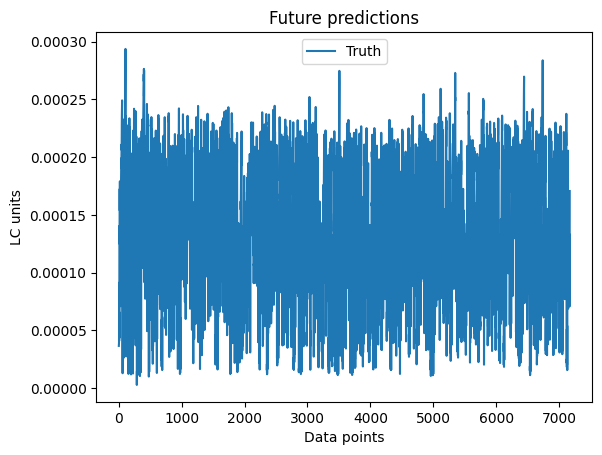

In [46]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [47]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [48]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB1***

## Data

### Get data

In [49]:
num = nums[1]

In [50]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

lc = pd.Series(sheet.loc[:,"LC"]).array

print(lc)

<PandasArray>
[0.000124761937589403, 6.60712411485371e-05, 4.96990719664704e-05,
 0.000123464545663354, 0.000116324127149644, 0.000163677373552329,
 0.000136333753439863, 0.000131087836778851, 0.000154927452489456,
 0.000140534652192943,
 ...
 0.000187738028772655, 9.27892671562061e-05,             8.17e-05,
          0.000193115,           0.00019364,          0.000199674,
          0.000205813,           0.00018306,             4.79e-05,
          0.000127026]
Length: 496, dtype: float64


In [51]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[0.0002285453083459288, 0.0002374804316787049, 0.0002340030332561582,
 0.0002405084378551692, 0.0002389878500252962, 0.0002416217757854611,
 0.0002636699937283993, 0.0002589099458418787, 0.0002683082711882889,
 0.0002710544213186949, 0.0002656244032550603,  0.000265146343735978,
 0.0002518654509913176, 0.0002743789518717676, 0.0002768667472992092,
 0.0002516514505259693, 0.0002602034946903586,  0.000255146442214027,
  0.000176166751771234, 0.0001893338485388085, 0.0001785346103133634,
 0.0001763735490385443, 0.0002053473144769669,  0.000214302126551047,
 0.0002200981543865055, 0.0002117719413945451, 0.0002170837542507797,
 0.0002192630927311257, 0.0001736572739901021, 0.0001288893836317584,
 0.0001342382311122492, 0.0001878690673038363, 0.0001685822790022939,
 0.0002049220347544178, 0.0002344676468055695, 0.0002230935351690277,
 0.0002358735218876973, 0.0002155138208763674, 0.0002091872593155131,
 0.0002187126810895279, 0.0002322640648344532, 0.0002271838020533323,
 0.000

In [52]:
len(lc_pred)

99

In [53]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [54]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [55]:
data = [lc_merged, lc]

### Normalize data

In [56]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [57]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(489, 7, 1) (489,)
[[0.32258554]
 [0.10027061]
 [0.03825435]
 [0.31767114]
 [0.2906239 ]
 [0.46999361]
 [0.36641851]] 0.34654746164308436
[[0.10027061]
 [0.03825435]
 [0.31767114]
 [0.2906239 ]
 [0.46999361]
 [0.36641851]
 [0.34654746]] 0.43684972041248804
[[0.03825435]
 [0.31767114]
 [0.2906239 ]
 [0.46999361]
 [0.36641851]
 [0.34654746]
 [0.43684972]] 0.38233112445148454
[[0.31767114]
 [0.2906239 ]
 [0.46999361]
 [0.36641851]
 [0.34654746]
 [0.43684972]
 [0.38233112]] 0.5198879897161115
[[0.2906239 ]
 [0.46999361]
 [0.36641851]
 [0.34654746]
 [0.43684972]
 [0.38233112]
 [0.51988799]] 0.5350902978823932
[[0.46999361]
 [0.36641851]
 [0.34654746]
 [0.43684972]
 [0.38233112]
 [0.51988799]
 [0.5350903 ]] 0.49424684779840755
[[0.36641851]
 [0.34654746]
 [0.43684972]
 [0.38233112]
 [0.51988799]
 [0.5350903 ]
 [0.49424685]] 0.4723770624397079
[[0.34654746]
 [0.43684972]
 [0.38233112]
 [0.51988799]
 [0.5350903 ]
 [0.49424685]
 [0.47237706]] 0.5341023419886477
[[0.43684972]
 [0.38233112]
 [0.5

In [58]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

391


In [59]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.32258554]
 [0.10027061]
 [0.03825435]
 [0.31767114]
 [0.2906239 ]
 [0.46999361]
 [0.36641851]] 0.34654746164308436
[[0.10027061]
 [0.03825435]
 [0.31767114]
 [0.2906239 ]
 [0.46999361]
 [0.36641851]
 [0.34654746]] 0.43684972041248804
[[0.03825435]
 [0.31767114]
 [0.2906239 ]
 [0.46999361]
 [0.36641851]
 [0.34654746]
 [0.43684972]] 0.38233112445148454
[[0.31767114]
 [0.2906239 ]
 [0.46999361]
 [0.36641851]
 [0.34654746]
 [0.43684972]
 [0.38233112]] 0.5198879897161115
[[0.2906239 ]
 [0.46999361]
 [0.36641851]
 [0.34654746]
 [0.43684972]
 [0.38233112]
 [0.51988799]] 0.5350902978823932
[[0.46999361]
 [0.36641851]
 [0.34654746]
 [0.43684972]
 [0.38233112]
 [0.51988799]
 [0.5350903 ]] 0.49424684779840755
[[0.36641851]
 [0.34654746]
 [0.43684972]
 [0.38233112]
 [0.51988799]
 [0.5350903 ]
 [0.49424685]] 0.4723770624397079
[[0.34654746]
 [0.43684972]
 [0.38233112]
 [0.51988799]
 [0.5350903 ]
 [0.49424685]
 [0.47237706]] 0.5341023419886477
[[0.43684972]
 [0.38233112]
 [0.51988799]
 [0.535090

In [60]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [61]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

391
391
98
98


In [62]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [63]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[1]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

497 0.09721255422981595
498 0.09739425632641324
499 0.0975899151066984
500 0.09775531501280749
501 0.09794606349668139
502 0.09814705124653084
503 0.0983397941722502
504 0.09850533937923282
505 0.09868439669434119
506 0.09888269446445301
507 0.09907115291342743
508 0.09925219673958745
509 0.09944513840081308
510 0.09964266595260378
511 0.09984194885827273
512 0.10002891083194082
513 0.10022794277527974
514 0.10042356920665735
515 0.10064110519077768
516 0.10083254458503471
517 0.10102372475147386
518 0.10118436111723678
519 0.10135525931899575
520 0.10155273299959627
521 0.10172965624723257
522 0.10190620511774579
523 0.10207419359129527
524 0.10228530238736094
525 0.10248961017122166
526 0.10258035305513441
527 0.1027061923573343
528 0.10287944390937592
529 0.10306545405682083
530 0.103264753231531
531 0.1034538054568544
532 0.10366029604255128
533 0.10387130140360351
534 0.10408239070010278
535 0.10429358052123244
536 0.1044856666753618
537 0.1046045448797373
538 0.10475607328907027


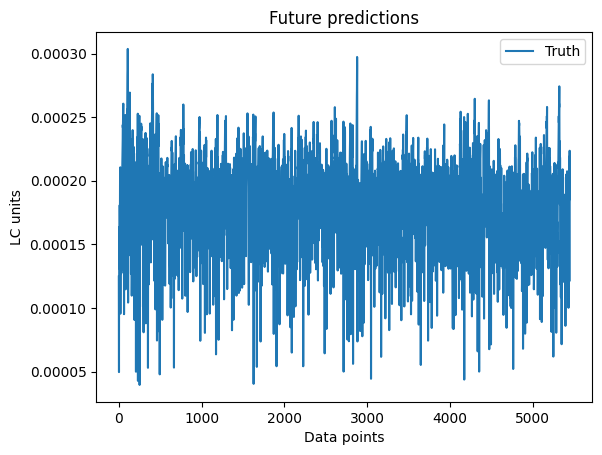

In [64]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [65]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [66]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB2-1***

## Data

### Get data

In [67]:
num = nums[2]

In [68]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

lc = pd.Series(sheet.loc[:,"LC1"]).array

print(lc)

<PandasArray>
[1.82e-08, 1.23e-07, 3.84e-07, 9.09e-07, 3.48e-06, 3.14e-06, 5.11e-06,
 1.11e-05, 1.15e-05, 4.17e-05,
 ...
 8.97e-07, 7.82e-07, 5.23e-09, 2.58e-08, 2.78e-07, 9.83e-07, 1.39e-06,
 2.25e-06, 6.06e-07, 2.53e-06]
Length: 485, dtype: float64


In [69]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[2.381450394750573e-05, 3.056930654565804e-05, 3.869939610012807e-05,
 4.907980110147037e-05, 6.240344373509288e-05, 7.748138159513474e-05,
 9.615634189685807e-05, 0.0001193220086861402, 0.0001478495541960001,
 0.0001803644554456696, 0.0002086733584292233, 0.0002379622019361705,
 0.0002692233247216791, 0.0003195261233486235, 0.0003936430148314685,
  0.000475267122965306,  0.000568692572414875, 0.0006569880642928183,
 0.0007397117442451417, 4.864346010435838e-06,  1.95203529074206e-06,
 8.433486300418735e-07, 1.273625798603462e-06, 1.982165031222394e-06,
 3.165790758430376e-06, 5.159717147762422e-06, 8.335926395375282e-06,
 1.321420859312639e-05, 1.944784344232175e-05, 2.489665530447382e-05,
 3.035011468455195e-05, 9.949613968274207e-07, 1.701156179478858e-06,
 5.238704403609518e-08, 1.225901996804168e-06, 1.858630071183143e-06,
 2.854040758393239e-06,   4.4813277781941e-06, 7.165873284975532e-06,
 1.153495577455033e-05, 1.792376497178338e-05, 2.337806108698715e-05,
 2.999

In [70]:
len(lc_pred)

97

In [71]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [72]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [73]:
data = [lc_merged, lc]

### Normalize data

In [74]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [75]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(478, 7, 1) (478,)
[[1.11014390e-05]
 [7.50288644e-05]
 [2.34237433e-04]
 [5.54484554e-04]
 [2.12278046e-03]
 [1.91538232e-03]
 [3.11707152e-03]] 0.006770938671223832
[[7.50288644e-05]
 [2.34237433e-04]
 [5.54484554e-04]
 [2.12278046e-03]
 [1.91538232e-03]
 [3.11707152e-03]
 [6.77093867e-03]] 0.007014936477796073
[[0.00023424]
 [0.00055448]
 [0.00212278]
 [0.00191538]
 [0.00311707]
 [0.00677094]
 [0.00701494]] 0.025436770874000265
[[0.00055448]
 [0.00212278]
 [0.00191538]
 [0.00311707]
 [0.00677094]
 [0.00701494]
 [0.02543677]] 0.03171971439323547
[[0.00212278]
 [0.00191538]
 [0.00311707]
 [0.00677094]
 [0.00701494]
 [0.02543677]
 [0.03171971]] 0.046603580594142165
[[0.00191538]
 [0.00311707]
 [0.00677094]
 [0.00701494]
 [0.02543677]
 [0.03171971]
 [0.04660358]] 0.05465550821102612
[[0.00311707]
 [0.00677094]
 [0.00701494]
 [0.02543677]
 [0.03171971]
 [0.04660358]
 [0.05465551]] 0.07977630238667119
[[0.00677094]
 [0.00701494]
 [0.02543677]
 [0.03171971]
 [0.04660358]
 [0.05465551]
 [0.

In [76]:
X[1][-1]

array([0.00677094])

In [77]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

382


In [78]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[1.11014390e-05]
 [7.50288644e-05]
 [2.34237433e-04]
 [5.54484554e-04]
 [2.12278046e-03]
 [1.91538232e-03]
 [3.11707152e-03]] 0.006770938671223832
[[7.50288644e-05]
 [2.34237433e-04]
 [5.54484554e-04]
 [2.12278046e-03]
 [1.91538232e-03]
 [3.11707152e-03]
 [6.77093867e-03]] 0.007014936477796073
[[0.00023424]
 [0.00055448]
 [0.00212278]
 [0.00191538]
 [0.00311707]
 [0.00677094]
 [0.00701494]] 0.025436770874000265
[[0.00055448]
 [0.00212278]
 [0.00191538]
 [0.00311707]
 [0.00677094]
 [0.00701494]
 [0.02543677]] 0.03171971439323547
[[0.00212278]
 [0.00191538]
 [0.00311707]
 [0.00677094]
 [0.00701494]
 [0.02543677]
 [0.03171971]] 0.046603580594142165
[[0.00191538]
 [0.00311707]
 [0.00677094]
 [0.00701494]
 [0.02543677]
 [0.03171971]
 [0.04660358]] 0.05465550821102612
[[0.00311707]
 [0.00677094]
 [0.00701494]
 [0.02543677]
 [0.03171971]
 [0.04660358]
 [0.05465551]] 0.07977630238667119
[[0.00677094]
 [0.00701494]
 [0.02543677]
 [0.03171971]
 [0.04660358]
 [0.05465551]
 [0.0797763 ]] 0.107210

In [79]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [80]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

382
382
96
96


In [81]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [82]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[2]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

Streaming output truncated to the last 5000 lines.
1967 0.26461720586025467
1968 0.2646261038643802
1969 0.2646391867710422
1970 0.26465724097028714
1971 0.2646807099499215
1972 0.26471023500921137
1973 0.26474764843801085
1974 0.26479508743427277
1975 0.26485430826500805
1976 0.26493722000663683
1977 0.26505741058276316
1978 0.26519848227685133
1979 0.26537589087451624
1980 0.26559283875753453
1981 0.26584995043590015
1982 0.2661748123391094
1983 0.2664888394683162
1984 0.26676179591226673
1985 0.2670391213941416
1986 0.26740987779698616
1987 0.26787154205153046
1988 0.26845199763551636
1989 0.26892889335062636
1990 0.26893137484893986
1991 0.26893137484969787
1992 0.26893137485045515
1993 0.26893137485141094
1994 0.2689318750804318
1995 0.26893326945847773
1996 0.268935869295467
1997 0.2689407941674403
1998 0.2689502884581202
1999 0.2689639500307862
2000 0.26898268969436
2001 0.2690068058413203
2002 0.26903723744309216
2003 0.26907568389052583
2004 0.26912462873716547
2005 0.26918579

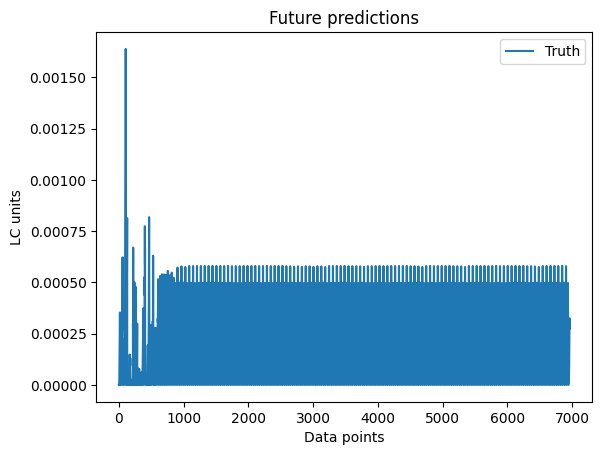

In [83]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [84]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [85]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB2-2***

## Data

### Get data

In [86]:
num = nums[3]

In [87]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

lc = pd.Series(sheet.loc[:,"LC2"]).array

print(lc)

<PandasArray>
[1.88e-10, 2.97e-08, 1.58e-07, 1.06e-06,  2.3e-06, 6.84e-06, 9.05e-06,
 1.37e-05, 2.47e-05, 3.15e-05,
 ...
  1.6e-06,  1.5e-06, 4.36e-08, 5.11e-07, 1.04e-06, 2.23e-06, 4.28e-06,
  4.5e-06, 1.72e-06, 6.26e-06]
Length: 496, dtype: float64


In [88]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[3.140662374789827e-05, 4.002922287327237e-05, 4.933372110826895e-05,
 5.812940798932686e-05, 7.510769501095638e-05, 0.0001043043012032285,
  0.000144004516187124, 0.0001972203172044829, 0.0002657363365869969,
 0.0002935921656899154, 0.0003201475192327052, 0.0003354602376930416,
 0.0003684875264298171, 0.0004018632171209902, 0.0004354545962996781,
  0.000470527564175427, 0.0005064245196990669,  0.000536993145942688,
 0.0005640375893563032,  8.81437608768465e-06, 3.512708133257547e-07,
   5.5119443231888e-07, 8.407567406720773e-07,   1.3783338772555e-06,
 2.294691739734844e-06, 5.119321485835826e-06, 1.281042023038026e-05,
 3.440129512455314e-05, 3.607724647736177e-05, 3.856145121972077e-05,
 4.174162313574925e-05, 4.337953498634306e-07, 3.741780574273434e-07,
 9.146976367446769e-07, 3.484140734144603e-06,  6.41203814666369e-06,
 8.138023076753598e-06, 1.024248649628134e-05, 1.296438131248578e-05,
 1.706731563899666e-05, 2.278598913107999e-05, 3.045905032195151e-05,
 3.888

In [89]:
len(lc_pred)

99

In [90]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [91]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [92]:
data = [lc_merged, lc]

### Normalize data

In [93]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [94]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(489, 7, 1) (489,)
[[1.07924258e-07]
 [1.71295936e-05]
 [9.11293283e-05]
 [6.11376879e-04]
 [1.32657307e-03]
 [3.94511395e-03]
 [5.21977813e-03]] 0.00790176383816342
[[1.71295936e-05]
 [9.11293283e-05]
 [6.11376879e-04]
 [1.32657307e-03]
 [3.94511395e-03]
 [5.21977813e-03]
 [7.90176384e-03]] 0.014246246160472254
[[9.11293283e-05]
 [6.11376879e-04]
 [1.32657307e-03]
 [3.94511395e-03]
 [5.21977813e-03]
 [7.90176384e-03]
 [1.42462462e-02]] 0.018168289777899534
[[0.00061138]
 [0.00132657]
 [0.00394511]
 [0.00521978]
 [0.00790176]
 [0.01424625]
 [0.01816829]] 0.033048984679314795
[[0.00132657]
 [0.00394511]
 [0.00521978]
 [0.00790176]
 [0.01424625]
 [0.01816829]
 [0.03304898]] 0.045334209539785536
[[0.00394511]
 [0.00521978]
 [0.00790176]
 [0.01424625]
 [0.01816829]
 [0.03304898]
 [0.04533421]] 0.054216484791017906
[[0.00521978]
 [0.00790176]
 [0.01424625]
 [0.01816829]
 [0.03304898]
 [0.04533421]
 [0.05421648]] 0.06647979234892067
[[0.00790176]
 [0.01424625]
 [0.01816829]
 [0.03304898]
 [0

In [95]:
X[1][-1]

array([0.00790176])

In [96]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

391


In [97]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[1.07924258e-07]
 [1.71295936e-05]
 [9.11293283e-05]
 [6.11376879e-04]
 [1.32657307e-03]
 [3.94511395e-03]
 [5.21977813e-03]] 0.00790176383816342
[[1.71295936e-05]
 [9.11293283e-05]
 [6.11376879e-04]
 [1.32657307e-03]
 [3.94511395e-03]
 [5.21977813e-03]
 [7.90176384e-03]] 0.014246246160472254
[[9.11293283e-05]
 [6.11376879e-04]
 [1.32657307e-03]
 [3.94511395e-03]
 [5.21977813e-03]
 [7.90176384e-03]
 [1.42462462e-02]] 0.018168289777899534
[[0.00061138]
 [0.00132657]
 [0.00394511]
 [0.00521978]
 [0.00790176]
 [0.01424625]
 [0.01816829]] 0.033048984679314795
[[0.00132657]
 [0.00394511]
 [0.00521978]
 [0.00790176]
 [0.01424625]
 [0.01816829]
 [0.03304898]] 0.045334209539785536
[[0.00394511]
 [0.00521978]
 [0.00790176]
 [0.01424625]
 [0.01816829]
 [0.03304898]
 [0.04533421]] 0.054216484791017906
[[0.00521978]
 [0.00790176]
 [0.01424625]
 [0.01816829]
 [0.03304898]
 [0.04533421]
 [0.05421648]] 0.06647979234892067
[[0.00790176]
 [0.01424625]
 [0.01816829]
 [0.03304898]
 [0.04533421]
 [0.0542

In [98]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [99]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

391
391
98
98


In [100]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [101]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[3]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

Streaming output truncated to the last 5000 lines.
21179 0.8178162434812724
21180 0.8179227608377435
21181 0.8180350310392417
21182 0.8180522984873708
21183 0.8180522984882528
21184 0.8180522984892842
21185 0.8180522984902734
21186 0.8180538989582271
21187 0.8180593352977337
21188 0.8180697763105524
21189 0.8180868237264474
21190 0.8181115507191532
21191 0.8181456825018938
21192 0.8181880012721774
21193 0.818239795518424
21194 0.8183028409999349
21195 0.8183800264756098
21196 0.8184729029176776
21197 0.818577545369011
21198 0.8186545421354492
21199 0.8186545423063549
21200 0.8186545423072369
21201 0.8186545423082024
21202 0.8186545423373022
21203 0.8186571810692871
21204 0.8186642892637823
21205 0.8186772660405981
21206 0.8186975726744126
21207 0.8187268813158002
21208 0.8187647533191043
21209 0.8188115255429724
21210 0.818868527956059
21211 0.8189388407804503
21212 0.8190239432983648
21213 0.8191248351899989
21214 0.8192313343129203
21215 0.81924383234082
21216 0.819243832341702
21217

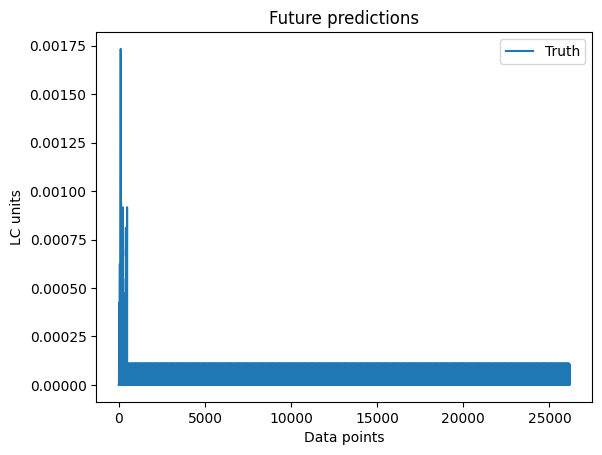

In [102]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [103]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [104]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB3-1-1***

## Data

### Get data

In [105]:
num = nums[4]

In [106]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')[:-2]

lc = pd.Series(sheet.loc[:,"AD1"]).array

print(lc)

<PandasArray>
[  3.12493869762179e-06,  4.226966081049842e-06,  4.876924176944798e-06,
  6.254302155778809e-06, 3.0026480034715293e-06,  9.560837720205367e-06,
  1.203386554440329e-05, 1.0576445682179632e-05,  1.912567112355825e-05,
  7.584942711868595e-06,
 ...
 1.7448083881120747e-06,  7.192723607432326e-06, 1.3084234355316426e-06,
  3.412929500800552e-06, 3.2370909223129497e-06, 1.7295150773868313e-06,
  2.855592283208608e-06, 3.4934604481501037e-06, 1.1313069525636538e-05,
 1.1760355485856407e-05]
Length: 485, dtype: float64


In [107]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[4.561004516290268e-06, 6.025016773492098e-06, 1.040938786900369e-05,
  1.79492708411999e-05, 1.929154132085387e-05, 2.042287997028325e-05,
 2.205096097895876e-05, 2.468988895998336e-05, 3.016930349986069e-05,
 3.779524922720157e-05, 4.878072650171816e-05, 6.431319343391806e-05,
 8.309761324198917e-05, 9.640891221351922e-05, 0.0001125123380916193,
 0.0001343668991466984, 0.0001629766484256834, 0.0001944682444445789,
 0.0002284181682625785, 2.038789034486399e-06, 2.221340992036858e-06,
 1.781097353159566e-06, 2.411210743957781e-06, 3.069399326705025e-06,
 3.623812062869547e-06, 4.038854058308061e-06, 4.233041181578301e-06,
 4.317145794630051e-06,  4.45967953055515e-06, 4.880197593593039e-06,
  6.29635906079784e-06, 1.859001827142492e-06,  2.29262468565139e-06,
  1.62833839567611e-06,  2.14005649468163e-06, 2.636931640154216e-06,
 3.120475412288215e-06, 3.499160129649681e-06, 3.742198259715224e-06,
 3.938426743843593e-06, 4.191554126009578e-06, 4.791388619196368e-06,
   6.8

In [108]:
len(lc_pred)

97

In [109]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [110]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [111]:
data = [lc_merged, lc]

### Normalize data

In [112]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [113]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(478, 7, 1) (478,)
[[0.00406455]
 [0.00561279]
 [0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]] 0.01453319801558204
[[0.00561279]
 [0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]] 0.026544038854726337
[[0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]] 0.010330423589687472
[[0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]] 0.015360856452513668
[[0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]] 0.01637198914235134
[[0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]] 0.028662912882932764
[[0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]
 [0.02866291]] 0.02688934246284118
[[0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]
 [0.02866291]
 [0.02688934]] 0.028261887616383746
[[0.02654404]
 [0.010330

In [114]:
X[1][-1]

array([0.0145332])

In [115]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

382


In [116]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.00406455]
 [0.00561279]
 [0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]] 0.01453319801558204
[[0.00561279]
 [0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]] 0.026544038854726337
[[0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]] 0.010330423589687472
[[0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]] 0.015360856452513668
[[0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]] 0.01637198914235134
[[0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]] 0.028662912882932764
[[0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]
 [0.02866291]] 0.02688934246284118
[[0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]
 [0.02866291]
 [0.02688934]] 0.028261887616383746
[[0.02654404]
 [0.01033042]
 [0.01536086]
 

In [117]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [118]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

382
382
96
96


In [119]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [120]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[4]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

Streaming output truncated to the last 5000 lines.
19170 0.7865069778654855
19171 0.786516557789639
19172 0.786528303381658
19173 0.7865451090756891
19174 0.7865647971203201
19175 0.7865882466331299
19176 0.7866204258362471
19177 0.7866943682793702
19178 0.7867846090276202
19179 0.7869179629824997
19180 0.7870630613224988
19181 0.7872637102310022
19182 0.7875906126328686
19183 0.7876108375940588
19184 0.7876110694356696
19185 0.7876113039777407
19186 0.7876116156629392
19187 0.787612283476477
19188 0.7876131142893711
19189 0.7876133795512884
19190 0.7876152157336661
19191 0.787617794405122
19192 0.7876212395387653
19193 0.7876257788263671
19194 0.7876319469616816
19195 0.7876391936449351
19196 0.7876483765882937
19197 0.7876596377534212
19198 0.787675239802155
19199 0.7876953710963049
19200 0.7877165670631426
19201 0.7877418475961518
19202 0.787798399303682
19203 0.7880161558657334
19204 0.7885314454121896
19205 0.7885327145803273
19206 0.7885329464058656
19207 0.7885331790801472
19208

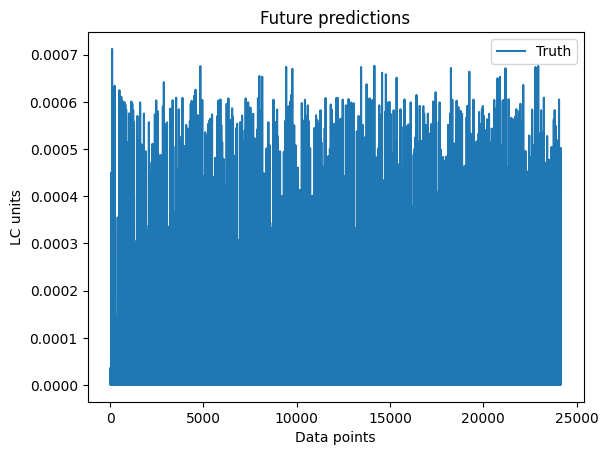

In [121]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [122]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [123]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB3-1-2***

## Data

### Get data

In [24]:
num = nums[5]

In [25]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')[:-2]

lc = pd.Series(sheet.loc[:,"AD2"]).array

print(lc)

<PandasArray>
[ 7.267314558018651e-07, 2.0055106545743913e-06,  3.834752024263048e-06,
  1.524071814176688e-06, 2.2684576481485536e-06, 1.2889934857796056e-06,
  2.467469863910923e-06, 3.5805294430909866e-06, 3.6823219166456934e-06,
  5.967367854821781e-06,
 ...
  6.720310026480268e-07, 3.4339407441484902e-06,  5.922233788906155e-07,
 2.2186722338810345e-07,  3.894854711385795e-07,  4.327701134729539e-07,
 4.6943521310413423e-07,   1.32652375167509e-06,  5.365370616901601e-06,
  4.167543168434016e-06]
Length: 496, dtype: float64


In [26]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[1.121962100114615e-06, 1.703364318927925e-06, 2.527219521653024e-06,
 3.654228294180939e-06, 5.253655672277091e-06, 7.297882348211715e-06,
 1.008844628813677e-05, 1.316253292316105e-05, 1.713926212687511e-05,
  2.13344392250292e-05, 2.650909846124705e-05, 3.284168633399531e-05,
 4.184499266557395e-05, 5.549794877879322e-05, 7.406367512885481e-05,
 9.677771595306695e-05, 0.0001254700182471424, 0.0001580931129865348,
  0.000189874044735916, 1.909760527496474e-07, 1.754758045535709e-07,
 1.608120072660313e-07, 1.726234444276997e-07, 1.931558415435575e-07,
 2.281393278735777e-07, 2.868772810415976e-07,  3.85016676318628e-07,
 5.496216317624203e-07, 8.054748832364567e-07, 1.197108076667064e-06,
 1.627332039788598e-06, 1.727034231180369e-07, 1.752141969291188e-07,
 1.608113961992785e-07, 1.737359411890793e-07, 1.947854997297327e-07,
 2.320549725709498e-07,  2.96239676345067e-07, 4.035391896195506e-07,
  5.78925153149612e-07, 8.685980219524936e-07, 1.301804445574817e-06,
 1.986

In [27]:
len(lc_pred)

99

In [28]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [29]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [30]:
data = [lc_merged, lc]

### Normalize data

In [31]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [32]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(489, 7, 1) (489,)
[[0.0009053 ]
 [0.00286721]
 [0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]] 0.005283604410893063
[[0.00286721]
 [0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]] 0.005439774542066924
[[0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]] 0.008945494674817893
[[0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]] 0.007203619206017039
[[0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]] 0.009140377251267014
[[0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]] 0.013879738405366594
[[0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]
 [0.01387974]] 0.019557180916903998
[[0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]
 [0.01387974]
 [0.01955718]] 0.022456358248262268
[[0.00543977]
 [0.008

In [33]:
X[1][-1]

array([0.0052836])

In [34]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

391


In [35]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.0009053 ]
 [0.00286721]
 [0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]] 0.005283604410893063
[[0.00286721]
 [0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]] 0.005439774542066924
[[0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]] 0.008945494674817893
[[0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]] 0.007203619206017039
[[0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]] 0.009140377251267014
[[0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]] 0.013879738405366594
[[0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]
 [0.01387974]] 0.019557180916903998
[[0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]
 [0.01387974]
 [0.01955718]] 0.022456358248262268
[[0.00543977]
 [0.00894549]
 [0.00720362

In [36]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [37]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

391
391
98
98


In [38]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [39]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[5]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

497 0.007975012300834253
498 0.00797911519650724
499 0.007986696966257926
500 0.00799092946219743
501 0.007996998347538368
502 0.008000508666940635
503 0.0080054324452466
504 0.008008377785858004
505 0.00801134578266455
506 0.008013036549799738
507 0.008014462036088747
508 0.00801535919565494
509 0.008016210497247715
510 0.00801695832613986
511 0.008017769269871581
512 0.008018599307137168
513 0.00801949654815998
514 0.008020430931923232
515 0.008021407662839822
516 0.008022405313839857
517 0.00802342047659194
518 0.008024441418045983
519 0.008025465330250784
520 0.008026487507935502
521 0.008027507437690377
522 0.008028524122027095
523 0.008029538231698
524 0.008030550113220573
525 0.008031560575476663
526 0.008032570109479723
527 0.008033579230458502
528 0.008034588212739339
529 0.008035597265619702
530 0.008036606464019217
531 0.008037615838519644
532 0.008038625368429978
533 0.008039635024305328
534 0.00804064476533212
535 0.008041654559223291
536 0.008042664378466628
537 0.0080436

KeyboardInterrupt: ignored

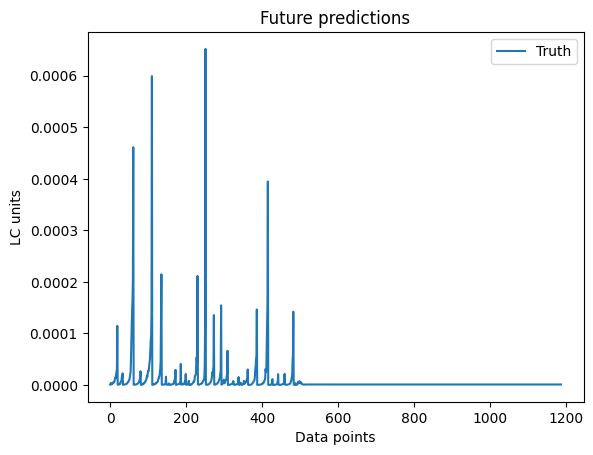

In [40]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [41]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [42]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB3-2-1***

## Data

### Get data

In [43]:
num = nums[6]

In [44]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')[:-2]

lc = pd.Series(sheet.loc[:,"AD1"]).array

print(lc)

<PandasArray>
[3.7499264371461483e-06,   5.07235929725981e-06,  5.852309012333759e-06,
  7.505162586934571e-06, 3.6031776041658356e-06, 1.1473005264246443e-05,
 1.4440638653283948e-05,  1.269173481861556e-05,   2.29508053482699e-05,
  9.101931254242314e-06,
 ...
 2.0937700657344897e-06,  8.631268328918793e-06,  1.570108122637971e-06,
  4.095515400960662e-06,   3.88450910677554e-06, 2.0754180928641977e-06,
 3.4267107398503294e-06, 4.1921525377801245e-06, 1.3575683430763845e-05,
 1.4112426583027687e-05]
Length: 485, dtype: float64


In [45]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[4.359625563665759e-06, 3.285295861132909e-06,  6.49039748168434e-06,
 1.437822720617987e-05, 1.928956044139341e-05, 1.821913247113116e-05,
 1.450671788916225e-05,  1.30930984596489e-05,  1.38069253807771e-05,
 1.349332615063759e-05, 1.799166238924954e-05,  3.21577608701773e-05,
 5.319984120433219e-05, 8.423075632890686e-05, 0.0001204578948090784,
 0.0001664235023781657, 0.0002230365644209087, 0.0002878392115235329,
 0.0003938179288525134, 4.811425696971128e-06, 7.212071523099439e-06,
 1.354313189949607e-05, 1.690709905233234e-05, 1.723928653518669e-05,
 1.838247044361196e-05,  1.51576250573271e-05, 1.135940237873001e-05,
 8.450523637293372e-06, 9.631266038923059e-06, 7.090736289683264e-06,
 4.634976448869566e-06, 5.212737505644327e-06, 3.408166094232001e-06,
 4.227360477671027e-06, 7.652316526218783e-06, 8.069928298937157e-06,
  8.40830853121588e-06, 7.808074769855011e-06, 6.245209533517482e-06,
 7.857067430450115e-06, 5.870956101716729e-06, 4.612898010236677e-06,
 4.575

In [46]:
len(lc_pred)

97

In [47]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [48]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [49]:
data = [lc_merged, lc]

### Normalize data

In [50]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [51]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(478, 7, 1) (478,)
[[0.00406455]
 [0.00561279]
 [0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]] 0.014533198015582045
[[0.00561279]
 [0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]] 0.026544038854726337
[[0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]] 0.010330423589687474
[[0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]] 0.015360856452513665
[[0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]] 0.016371989142351343
[[0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]] 0.028662912882932767
[[0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]
 [0.02866291]] 0.026889342462841182
[[0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]
 [0.02866291]
 [0.02688934]] 0.02826188761638375
[[0.02654404]
 [0.0103

In [52]:
X[1][-1]

array([0.0145332])

In [53]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

382


In [54]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.00406455]
 [0.00561279]
 [0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]] 0.014533198015582045
[[0.00561279]
 [0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]] 0.026544038854726337
[[0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]] 0.010330423589687474
[[0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]] 0.015360856452513665
[[0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]] 0.016371989142351343
[[0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]] 0.028662912882932767
[[0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]
 [0.02866291]] 0.026889342462841182
[[0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]
 [0.02866291]
 [0.02688934]] 0.02826188761638375
[[0.02654404]
 [0.01033042]
 [0.01536086]

In [55]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [56]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

382
382
96
96


In [57]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [58]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[6]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

Streaming output truncated to the last 5000 lines.
17837 0.7786688093803376
17838 0.7789420954542718
17839 0.7789797553634115
17840 0.7789821261168752
17841 0.7789833603948635
17842 0.7789837565049025
17843 0.7789898938870179
17844 0.7789922646225191
17845 0.7789926273124079
17846 0.778995615724642
17847 0.7789999934700687
17848 0.779004202556524
17849 0.7790137972199487
17850 0.7790318909276435
17851 0.7790434182309296
17852 0.7790609825417674
17853 0.77908790390872
17854 0.7791149447432586
17855 0.7791508045804845
17856 0.77918001109835
17857 0.7792559107376915
17858 0.779627071072599
17859 0.7803710724304151
17860 0.7803713510592045
17861 0.7803716292567797
17862 0.780371909668264
17863 0.7803721878596432
17864 0.7803734770274557
17865 0.7803741656601231
17866 0.7803744444198228
17867 0.7803782393690026
17868 0.7803849316242859
17869 0.7803982055248353
17870 0.7804114731644232
17871 0.7804233061106798
17872 0.7804361864283065
17873 0.7804533299086698
17874 0.7804829571842502
17875 0

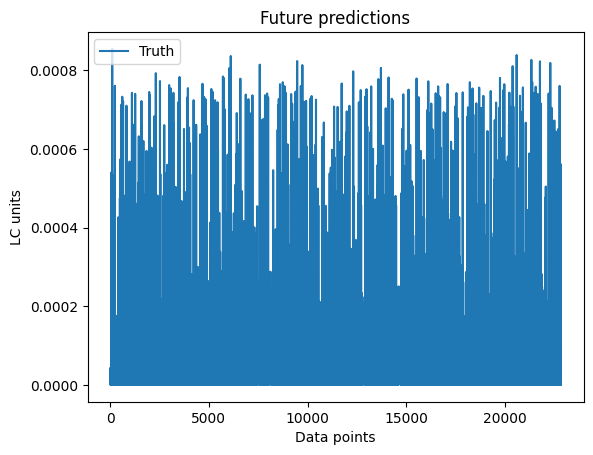

In [59]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [60]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [61]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB3-2-2***

## Data

### Get data

In [62]:
num = nums[7]

In [63]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')[:-2]

lc = pd.Series(sheet.loc[:,"AD2"]).array

print(lc)

<PandasArray>
[ 8.720777469622382e-07,   2.40661278548927e-06,  4.601702429115659e-06,
 1.8288861770120263e-06, 2.7221491777782646e-06, 1.5467921829355267e-06,
 2.9609638366931074e-06,  4.296635331709184e-06,  4.418786299974833e-06,
  7.160841425786137e-06,
 ...
  6.815286006481056e-07,  6.563406451790155e-07,  8.064372031776321e-07,
  4.120728892978189e-06,  7.106680546687385e-07, 2.6624066806572417e-07,
  4.673825653662954e-07,  5.193241361675446e-07,  5.633222557249611e-07,
  1.591828502010108e-06]
Length: 494, dtype: float64


In [64]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[1.964455123015796e-06, 2.514429752409342e-06,  3.21432435157476e-06,
  4.10042275689193e-06, 5.175415935809724e-06, 6.482104254246224e-06,
 8.178638381650671e-06, 1.020950548991095e-05, 1.298808183491929e-05,
 1.644591975491494e-05, 2.119363671226893e-05, 2.758547634584829e-05,
 3.578440737328492e-05, 4.763848482980393e-05, 6.703451799694449e-05,
 9.173572470899671e-05, 0.0001261177530977875, 0.0001653458457440138,
 0.0002081746642943472, 0.0002247362863272429, 0.0002257244341308251,
 9.160384024653467e-07, 7.246990776366147e-07, 5.892663352824457e-07,
 7.000541586421605e-07,  8.55922507980722e-07, 1.041715904648299e-06,
 1.284742779716908e-06, 1.611715106264455e-06, 2.068295998469694e-06,
  2.62710454990156e-06, 3.332093683638959e-06, 4.044677552883513e-06,
 9.054836027644342e-07, 8.421137636105414e-07, 5.976178840683133e-07,
 7.126670880097663e-07, 8.582609893892368e-07, 1.049792558660556e-06,
 1.299855853176268e-06, 1.648517240937508e-06, 2.120459157595178e-06,
 2.722

In [65]:
len(lc_pred)

99

In [66]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [67]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [68]:
data = [lc_merged, lc]

### Normalize data

In [69]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [70]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(487, 7, 1) (487,)
[[0.0009053 ]
 [0.00286721]
 [0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]] 0.005283604410893063
[[0.00286721]
 [0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]] 0.005439774542066924
[[0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]] 0.008945494674817893
[[0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]] 0.007203619206017037
[[0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]] 0.009140377251267012
[[0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]] 0.013879738405366592
[[0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]
 [0.01387974]] 0.019557180916903998
[[0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]
 [0.01387974]
 [0.01955718]] 0.022456358248262268
[[0.00543977]
 [0.008

In [71]:
X[1][-1]

array([0.0052836])

In [72]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

389


In [73]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.0009053 ]
 [0.00286721]
 [0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]] 0.005283604410893063
[[0.00286721]
 [0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]] 0.005439774542066924
[[0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]] 0.008945494674817893
[[0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]] 0.007203619206017037
[[0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]] 0.009140377251267012
[[0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]] 0.013879738405366592
[[0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]
 [0.01387974]] 0.019557180916903998
[[0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]
 [0.01387974]
 [0.01955718]] 0.022456358248262268
[[0.00543977]
 [0.00894549]
 [0.00720362

In [74]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [75]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

389
389
98
98


In [76]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [77]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[7]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

Streaming output truncated to the last 5000 lines.
22499 0.04329743378147614
22500 0.04329896733244768
22501 0.04330050088262342
22502 0.04330203443359496
22503 0.043303567984566506
22504 0.04330510153553805
22505 0.043306635086509594
22506 0.04330816863748114
22507 0.043309702187656875
22508 0.04331123573862842
22509 0.04331276928959996
22510 0.04331430284057151
22511 0.04331583639154305
22512 0.043317369942514596
22513 0.04331890349269033
22514 0.043320437043661876
22515 0.04332197059463342
22516 0.043323504145604964
22517 0.04332503769657651
22518 0.04332657124754805
22519 0.04332810479772379
22520 0.04332963834869533
22521 0.04333117189966688
22522 0.04333270545063842
22523 0.043334239001609966
22524 0.04333577255258151
22525 0.043337306102757246
22526 0.04333883965372879
22527 0.043340373204700335
22528 0.04334190675567188
22529 0.04334344030664342
22530 0.04334497385761497
22531 0.0433465074077907
22532 0.04334804095876225
22533 0.04334957450973379
22534 0.043351108060705336
2253

KeyboardInterrupt: ignored

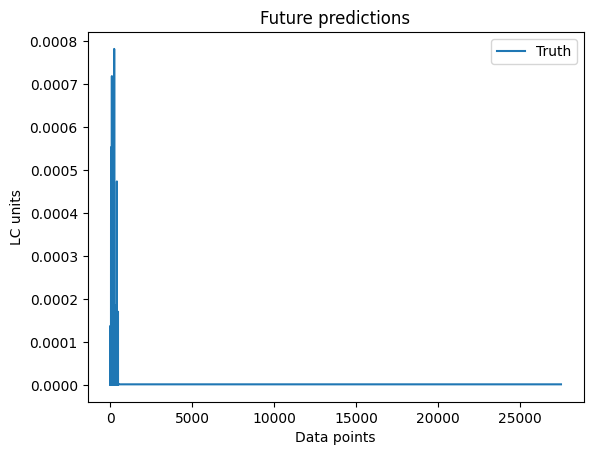

In [78]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [79]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [80]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB3-3-1***

## Data

### Get data

In [81]:
num = nums[8]

In [82]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')[:-2]

lc = pd.Series(sheet.loc[:,"AD1"]).array

print(lc)

<PandasArray>
[4.6874080464326856e-06,  6.340449121574764e-06, 7.3153862654171975e-06,
  9.381453233668214e-06,  4.503972005207294e-06, 1.4341256580308051e-05,
 1.8050798316604935e-05,  1.586466852326945e-05, 2.8688506685337374e-05,
 1.1377414067802892e-05,
 ...
 3.0190597563318384e-06, 3.7450371757908556e-06,  2.617212582168112e-06,
 1.0789085411148489e-05, 1.9626351532974636e-06,  5.119394251200828e-06,
  4.855636383469424e-06, 2.5942726160802467e-06,  4.283388424812912e-06,
  5.240190672225156e-06]
Length: 483, dtype: float64


In [83]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[6.328647486952832e-06, 6.443213806051062e-06, 8.283771421702113e-06,
 1.051257913786685e-05, 1.974898623302579e-05, 2.481055344105698e-05,
 2.865141141228378e-05,  2.90826919808751e-05,  2.81777774944203e-05,
 2.883103661588393e-05, 3.168444163748063e-05, 3.576083690859377e-05,
 5.364119351725094e-05,   8.4452229202725e-05,  0.000126139129861258,
 0.0001862694916781038, 0.0002498408721294254, 0.0003114683204330504,
  0.000397323485231027, 0.0006505128112621605,  0.000822915812022984,
 2.419099473627284e-06, 4.395913038024446e-06, 6.253135779843433e-06,
 1.048920330504188e-05, 1.207237619382795e-05, 1.173585860669846e-05,
 1.163751585409045e-05, 1.075789714377606e-05,  9.37734694161918e-06,
 7.843605089874472e-06,   9.2314112407621e-06, 1.108132346416824e-05,
 2.337410478503443e-06, 2.334908458578866e-06, 2.220325086454977e-06,
 3.820247457042569e-06, 6.103919986344408e-06, 6.648974704148713e-06,
  7.29300654711551e-06, 6.807470981584629e-06, 6.464181296905736e-06,
 7.300

In [84]:
len(lc_pred)

97

In [85]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [86]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [87]:
data = [lc_merged, lc]

### Normalize data

In [88]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [89]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(476, 7, 1) (476,)
[[0.00406455]
 [0.00561279]
 [0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]] 0.014533198015582045
[[0.00561279]
 [0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]] 0.026544038854726337
[[0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]] 0.010330423589687474
[[0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]] 0.015360856452513665
[[0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]] 0.016371989142351343
[[0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]] 0.02866291288293277
[[0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]
 [0.02866291]] 0.026889342462841182
[[0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]
 [0.02866291]
 [0.02688934]] 0.028261887616383752
[[0.02654404]
 [0.0103

In [90]:
X[1][-1]

array([0.0145332])

In [91]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

380


In [92]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.00406455]
 [0.00561279]
 [0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]] 0.014533198015582045
[[0.00561279]
 [0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]] 0.026544038854726337
[[0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]] 0.010330423589687474
[[0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]] 0.015360856452513665
[[0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]] 0.016371989142351343
[[0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]] 0.02866291288293277
[[0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]
 [0.02866291]] 0.026889342462841182
[[0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]
 [0.02866291]
 [0.02688934]] 0.028261887616383752
[[0.02654404]
 [0.01033042]
 [0.01536086]

In [93]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [94]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

380
380
96
96


In [95]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [96]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[8]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

Streaming output truncated to the last 5000 lines.
15334 0.7467853998765376
15335 0.7468031384702071
15336 0.7468099107160041
15337 0.7468262587504823
15338 0.7468266566068363
15339 0.7468314808273048
15340 0.7468357046853183
15341 0.7468395925082317
15342 0.746842726822288
15343 0.7468481888863975
15344 0.7468512554933481
15345 0.7468563282550716
15346 0.7468618764938041
15347 0.7468669053428497
15348 0.7468733895648624
15349 0.7468808502226606
15350 0.7468878966247215
15351 0.7468970899817945
15352 0.74690758803994
15353 0.7469187264878568
15354 0.7469321972485344
15355 0.7469478669964159
15356 0.7469646367272075
15357 0.7469844380330327
15358 0.7470133728939258
15359 0.7470482592007469
15360 0.7470746108001917
15361 0.7471086955402283
15362 0.7472524962713946
15363 0.7473071726372295
15364 0.7475187461923637
15365 0.7476120249512318
15366 0.7477663044874502
15367 0.7482467781692689
15368 0.7487013738891987
15369 0.7487053462773842
15370 0.7487056945087515
15371 0.7487060422494748
15

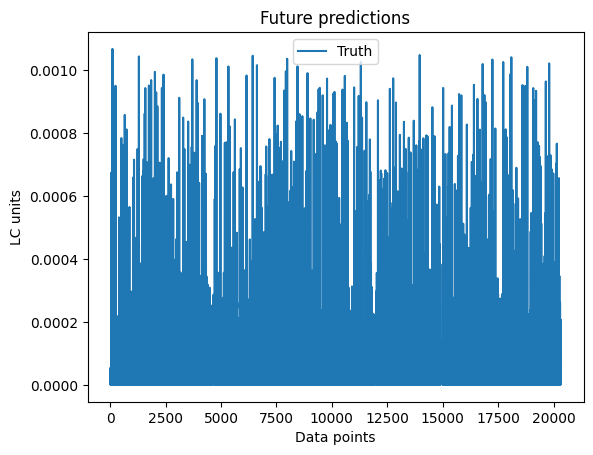

In [97]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [98]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [99]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB3-3-2***

## Data

### Get data

In [100]:
num = nums[9]

In [101]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')[:-2]

lc = pd.Series(sheet.loc[:,"AD2"]).array

print(lc)

<PandasArray>
[1.0900971837027976e-06, 3.0082659818615873e-06, 5.7521280363945725e-06,
 2.2861077212650323e-06, 3.4026864722228308e-06, 1.9334902286694084e-06,
 3.7012047958663842e-06,   5.37079416463648e-06,   5.52348287496854e-06,
  8.951051782232673e-06,
 ...
   8.51910750810132e-07,  8.204258064737693e-07, 1.0080465039720401e-06,
  5.150911116222735e-06,  8.883350683359231e-07,  3.328008350821552e-07,
  5.842282067078693e-07,  6.491551702094308e-07,  7.041528196562014e-07,
  1.989785627512635e-06]
Length: 494, dtype: float64


In [102]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[3.068895466640242e-07, 4.026795181744092e-07, 5.460134957502305e-07,
 7.429250672430499e-07, 1.078183458957938e-06, 2.039673972831224e-06,
 3.717548679560423e-06, 6.462815690611023e-06, 1.087570399249671e-05,
 1.722694651107304e-05, 2.591515294625424e-05, 3.702342655742541e-05,
 5.207987851463258e-05, 7.043429650366306e-05, 9.327700536232442e-05,
 0.0001204553118441254,   0.00015291191812139, 0.0001858314935816452,
 0.0002198811416747048, 0.0002559193235356361, 0.0002933848882094026,
 2.072305704814426e-07, 2.050242642326339e-07,  2.04990428187557e-07,
 2.051466196917318e-07, 2.061008927967123e-07, 2.101250942132538e-07,
 2.232407609881193e-07,  2.57256402846906e-07, 3.275331721397379e-07,
  4.43627982349426e-07, 6.079683885218401e-07, 7.852295311749913e-07,
 2.068734232807401e-07, 2.050172867029687e-07, 2.049966099093581e-07,
 2.052085363857259e-07, 2.064887496544543e-07, 2.117068191864746e-07,
 2.274183117378925e-07,  2.67344432813843e-07, 3.452289831784583e-07,
 4.706

In [103]:
len(lc_pred)

99

In [104]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [105]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [106]:
data = [lc_merged, lc]

### Normalize data

In [107]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [108]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(487, 7, 1) (487,)
[[0.0009053 ]
 [0.00286721]
 [0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]] 0.005283604410893063
[[0.00286721]
 [0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]] 0.005439774542066923
[[0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]] 0.008945494674817894
[[0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]] 0.007203619206017039
[[0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]] 0.009140377251267014
[[0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]] 0.013879738405366592
[[0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]
 [0.01387974]] 0.019557180916903998
[[0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]
 [0.01387974]
 [0.01955718]] 0.02245635824826227
[[0.00543977]
 [0.0089

In [109]:
X[1][-1]

array([0.0052836])

In [110]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

389


In [111]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.0009053 ]
 [0.00286721]
 [0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]] 0.005283604410893063
[[0.00286721]
 [0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]] 0.005439774542066923
[[0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]] 0.008945494674817894
[[0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]] 0.007203619206017039
[[0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]] 0.009140377251267014
[[0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]] 0.013879738405366592
[[0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]
 [0.01387974]] 0.019557180916903998
[[0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]
 [0.01387974]
 [0.01955718]] 0.02245635824826227
[[0.00543977]
 [0.00894549]
 [0.00720362]

In [112]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [113]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

389
389
98
98


In [114]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [115]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[9]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

Streaming output truncated to the last 5000 lines.
9316 0.04675953914542037
9317 0.0467611553729846
9318 0.046767401546127754
9319 0.046769017772896174
9320 0.04677526394058236
9321 0.04677688016882871
9322 0.046783126336514894
9323 0.04678474256407912
9324 0.046790988737222275
9325 0.046792604963990694
9326 0.04679885113167688
9327 0.04680046735992323
9328 0.046806713527609414
9329 0.04680832975517364
9330 0.046814575928316796
9331 0.046816192155085215
9332 0.0468224383227714
9333 0.04682405455101775
9334 0.046830300718703935
9335 0.04683191694626816
9336 0.046838163119411316
9337 0.046839779346179736
9338 0.04684602551386592
9339 0.04684764174211227
9340 0.046853887909798456
9341 0.04685550413736268
9342 0.04686175031050584
9343 0.046863366537274256
9344 0.04686961270496044
9345 0.04687122893320679
9346 0.046877475100892976
9347 0.046879091328457204
9348 0.04688533750160036
9349 0.04688695372836878
9350 0.04689319989605496
9351 0.04689481612430131
9352 0.0469010622919875
9353 0.04690

KeyboardInterrupt: ignored

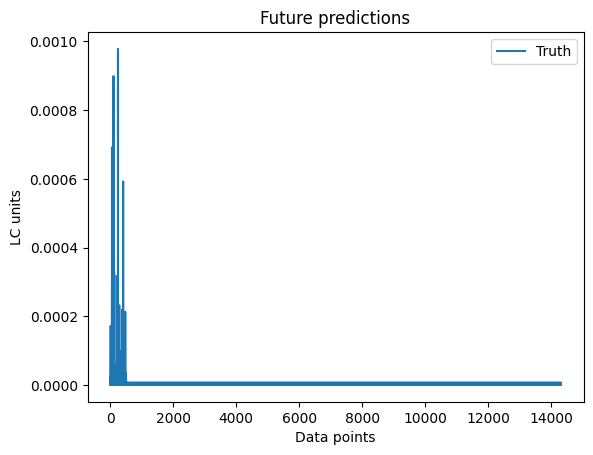

In [116]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [117]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [118]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB3-4-1***

## Data

### Get data

In [119]:
num = nums[10]

In [120]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')[:-2]

lc = pd.Series(sheet.loc[:,"AD1"]).array

print(lc)

<PandasArray>
[  6.24987739524358e-06,  8.453932162099685e-06,  9.753848353889596e-06,
 1.2508604311557619e-05, 6.0052960069430586e-06, 1.9121675440410734e-05,
  2.406773108880658e-05, 2.1152891364359263e-05,   3.82513422471165e-05,
  1.516988542373719e-05,
 ...
  4.025413008442452e-06,  4.993382901054474e-06, 3.4896167762241494e-06,
 1.4385447214864652e-05,  2.616846871063285e-06,  6.825859001601104e-06,
  6.474181844625899e-06, 3.4590301547736627e-06,  5.711184566417216e-06,
 6.9869208963002075e-06]
Length: 483, dtype: float64


In [121]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[3.487934918666724e-06, 4.075251581525663e-06, 5.202001375437248e-06,
 7.235677912831306e-06, 9.789952855498996e-06, 1.319822422374273e-05,
 1.656664971960708e-05, 2.011058495554607e-05, 2.571414916019421e-05,
 3.436963743297383e-05, 4.709472341346554e-05, 6.933081749593839e-05,
 0.0001045035969582386, 0.0001465251843910664, 0.0001927744742715731,
 0.0002504564181435853, 0.0003229699505027384, 0.0004155158821959049,
 0.0005409756558947265, 0.0007170421304181218, 0.0008813420427031815,
 2.704960252231103e-06,  3.29254248754296e-06, 2.101000291077071e-06,
 2.698386197153013e-06, 3.714577815117082e-06, 3.790959453908727e-06,
 3.987302079622168e-06, 3.910812665708363e-06, 4.038844053866342e-06,
 4.630417151929578e-06,    5.764623892901e-06, 7.465266662620706e-06,
 1.284362497244729e-06, 1.941069967870135e-06, 1.183787958325411e-06,
 1.302764417232538e-06, 1.681690037003136e-06, 2.499374431863544e-06,
 2.947823077192879e-06,   3.3809767501225e-06, 3.784747605095617e-06,
 4.502

In [122]:
len(lc_pred)

97

In [123]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [124]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [125]:
data = [lc_merged, lc]

### Normalize data

In [126]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [127]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(476, 7, 1) (476,)
[[0.00406455]
 [0.00561279]
 [0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]] 0.01453319801558204
[[0.00561279]
 [0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]] 0.026544038854726337
[[0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]] 0.010330423589687472
[[0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]] 0.015360856452513668
[[0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]] 0.01637198914235134
[[0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]] 0.028662912882932764
[[0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]
 [0.02866291]] 0.02688934246284118
[[0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]
 [0.02866291]
 [0.02688934]] 0.028261887616383746
[[0.02654404]
 [0.010330

In [128]:
X[1][-1]

array([0.0145332])

In [129]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

380


In [130]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.00406455]
 [0.00561279]
 [0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]] 0.01453319801558204
[[0.00561279]
 [0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]] 0.026544038854726337
[[0.00652592]
 [0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]] 0.010330423589687472
[[0.008461  ]
 [0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]] 0.015360856452513668
[[0.00389274]
 [0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]] 0.01637198914235134
[[0.01310637]
 [0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]] 0.028662912882932764
[[0.01658073]
 [0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]
 [0.02866291]] 0.02688934246284118
[[0.0145332 ]
 [0.02654404]
 [0.01033042]
 [0.01536086]
 [0.01637199]
 [0.02866291]
 [0.02688934]] 0.028261887616383746
[[0.02654404]
 [0.01033042]
 [0.01536086]
 

In [131]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [132]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

380
380
96
96


In [133]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [136]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[10]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

Streaming output truncated to the last 5000 lines.
8850 0.6311456597538567
8851 0.6311461388707202
8852 0.6311605414505566
8853 0.6311664873381078
8854 0.6311732310225879
8855 0.6311780665171527
8856 0.6311855318238331
8857 0.6311939400832516
8858 0.6312027222441274
8859 0.631215600520848
8860 0.6312342708991154
8861 0.631261764752965
8862 0.6312948054803955
8863 0.631335821705109
8864 0.631383916956368
8865 0.6314631878670143
8866 0.6316785231940985
8867 0.6316990017114976
8868 0.6317314011651278
8869 0.6317782530971117
8870 0.6318092028962228
8871 0.6318321511155618
8872 0.6318508201914328
8873 0.6318738994598634
8874 0.6319050410604932
8875 0.6319626100996929
8876 0.6319908052485361
8877 0.6320135484113807
8878 0.6320481335663162
8879 0.632097669926482
8880 0.632188197165563
8881 0.632196258828374
8882 0.6322063493474006
8883 0.6322193950839237
8884 0.6322291453509779
8885 0.6322404057239355
8886 0.6322504095353751
8887 0.6322644791037264
8888 0.632281162145121
8889 0.63230562684683

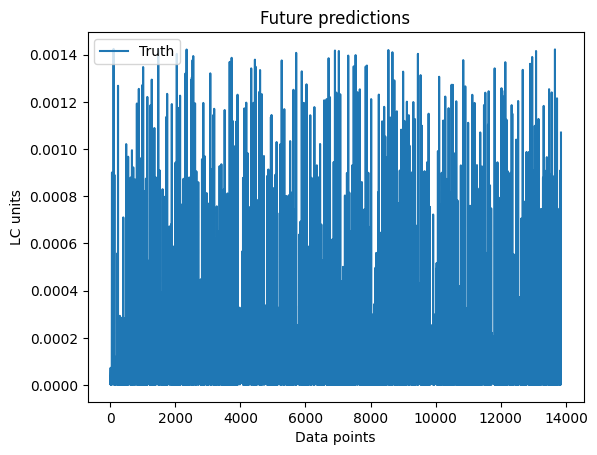

In [137]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [138]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [139]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB3-4-2***

## Data

### Get data

In [24]:
num = nums[11]

In [25]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')[:-2]

lc = pd.Series(sheet.loc[:,"AD2"]).array

print(lc)

<PandasArray>
[1.4534629116037301e-06, 4.0110213091487825e-06,  7.669504048526097e-06,
  3.048143628353376e-06,  4.536915296297107e-06,  2.577986971559211e-06,
  4.934939727821846e-06,  7.161058886181973e-06,  7.364643833291387e-06,
 1.1934735709643561e-05,
 ...
 1.1358810010801761e-06,  1.093901075298359e-06, 1.3440620052960536e-06,
 6.8678814882969804e-06,  1.184446757781231e-06,  4.437344467762069e-07,
   7.78970942277159e-07,  8.655402269459078e-07,  9.388704262082685e-07,
   2.65304750335018e-06]
Length: 494, dtype: float64


In [26]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[1.216064447362442e-06, 1.549209514450922e-06, 2.055612867479795e-06,
 2.795158707158407e-06, 3.809779855146189e-06, 5.224846972851083e-06,
 7.105625172698637e-06, 9.498695362708531e-06, 1.301868178416044e-05,
  1.74308388523059e-05,  2.40442059293855e-05,  3.28233654727228e-05,
 4.620606341632083e-05, 6.395397213054821e-05, 8.770939166424796e-05,
 0.0001169875176856294,  0.000156339374370873, 0.0002050251350738108,
 0.0002663283084984869,  0.000338447600370273, 0.0004166061989963055,
 1.832786892919103e-06, 1.246240458385728e-06, 6.718910299241543e-07,
 6.868329478493251e-07, 7.186968105088454e-07, 7.731776463515416e-07,
 8.698440296939225e-07, 1.026026779982203e-06, 1.273610223506694e-06,
 1.645011479922687e-06, 2.231465032309643e-06, 2.942612582046422e-06,
 1.659379677221295e-06, 1.521403078186268e-06, 6.721730869685416e-07,
 6.885828156555363e-07, 7.205208589766698e-07,  7.81120093051868e-07,
  8.82181041106378e-07, 1.046884449351637e-06, 1.307780735260167e-06,
 1.709

In [27]:
len(lc_pred)

99

In [28]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [29]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [30]:
data = [lc_merged, lc]

### Normalize data

In [31]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [32]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(487, 7, 1) (487,)
[[0.0009053 ]
 [0.00286721]
 [0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]] 0.005283604410893063
[[0.00286721]
 [0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]] 0.005439774542066924
[[0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]] 0.008945494674817893
[[0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]] 0.007203619206017039
[[0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]] 0.009140377251267014
[[0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]] 0.013879738405366594
[[0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]
 [0.01387974]] 0.019557180916903998
[[0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]
 [0.01387974]
 [0.01955718]] 0.022456358248262268
[[0.00543977]
 [0.008

In [33]:
X[1][-1]

array([0.0052836])

In [34]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

389


In [35]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.0009053 ]
 [0.00286721]
 [0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]] 0.005283604410893063
[[0.00286721]
 [0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]] 0.005439774542066924
[[0.00567363]
 [0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]] 0.008945494674817893
[[0.00212858]
 [0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]] 0.007203619206017039
[[0.00327062]
 [0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]] 0.009140377251267014
[[0.00176793]
 [0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]] 0.013879738405366594
[[0.00357595]
 [0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]
 [0.01387974]] 0.019557180916903998
[[0.0052836 ]
 [0.00543977]
 [0.00894549]
 [0.00720362]
 [0.00914038]
 [0.01387974]
 [0.01955718]] 0.022456358248262268
[[0.00543977]
 [0.00894549]
 [0.00720362

In [36]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [37]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

389
389
98
98


In [38]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [39]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[11]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

Streaming output truncated to the last 5000 lines.
7608 0.593523329386946
7609 0.5935301193687992
7610 0.5935378684746611
7611 0.5935468186419457
7612 0.5935573758508981
7613 0.5935701353212353
7614 0.5935859207804897
7615 0.5936059945854795
7616 0.5936295597951102
7617 0.5936595321384375
7618 0.5936953256625856
7619 0.5937457375969388
7620 0.5938205240948009
7621 0.5939646331956028
7622 0.5941058667215402
7623 0.5943205503702047
7624 0.5946542415315634
7625 0.5949078177348128
7626 0.5959347165901563
7627 0.5959349898894204
7628 0.5959352631886845
7629 0.5959355364880055
7630 0.5959358312043634
7631 0.5959361113784127
7632 0.5959364015806643
7633 0.5959374687676502
7634 0.5959406343771918
7635 0.595944703932608
7636 0.595949496806432
7637 0.5959548249247093
7638 0.5959608042702969
7639 0.5959675942580618
7640 0.5959753433748376
7641 0.5959842935512172
7642 0.595994850773812
7643 0.5960076102623391
7644 0.5960233957579733
7645 0.5960434695884289
7646 0.5960670348653623
7647 0.5960970072

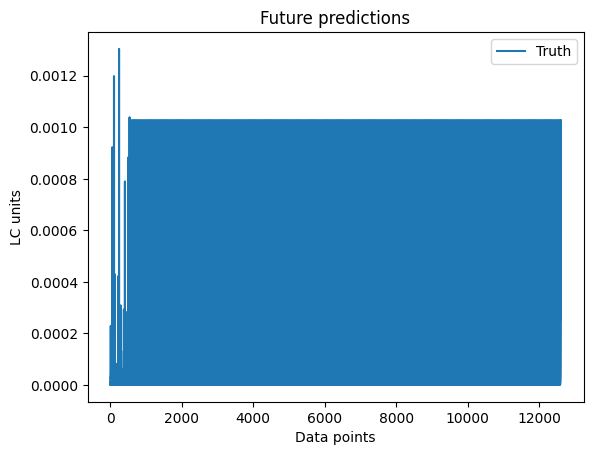

In [40]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [41]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [42]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB4-1***

## Data

### Get data

In [43]:
num = nums[12]

In [44]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

lc = pd.Series(sheet.loc[:,"LC1"]).array

print(lc)

<PandasArray>
[8.10754171586822e-06, 3.20969204300993e-05,  9.3115942898016e-05,
 9.82238236214372e-05, 0.000130502086519986, 0.000176038441775124,
 0.000250089092988489, 0.000251669217116909,  0.00025812457356209,
 3.61858166944746e-05,
 ...
             8.97e-07,             7.82e-07,             5.23e-09,
             2.58e-08,             2.78e-07,             9.83e-07,
             1.39e-06,             2.25e-06,             6.06e-07,
             2.53e-06]
Length: 387, dtype: float64


In [45]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[1.537131844031592e-08, 3.421169125772394e-08, 7.844544569479694e-08,
 2.202482249913373e-07, 6.948106374693452e-07, 4.240043836034602e-06,
 1.783611151040532e-05, 1.992724355659448e-05, 2.546594078012276e-05,
 3.092623592237942e-05, 3.331551124574617e-05, 1.066177262032397e-07,
 6.074737601835523e-09, 5.929484458988554e-09, 1.527565807180054e-08,
 4.963514399491942e-08, 1.195843992718437e-06, 9.879057870421093e-06,
 3.007722261827439e-05, 1.907882870000321e-05,   2.6154802981182e-05,
 3.466807174845599e-05, 4.012537465314381e-05, 4.594127312884666e-05,
 6.480921001639217e-05, 8.908241579774767e-05, 1.827188384595502e-06,
 8.550779284632881e-08, 2.830602454650943e-07, 9.698344456410268e-07,
  3.84833401767537e-06, 6.463979389081942e-06, 2.256678635603748e-05,
 3.224967440473847e-05, 3.840006320388056e-05, 4.024027293780819e-05,
 6.121164187788963e-05, 8.208747749449685e-05, 0.0001198385289171711,
 0.0001273413799935952, 0.0001000108823063783, 5.415640407591127e-05,
  4.46

In [46]:
len(lc_pred)

77

In [47]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [48]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [49]:
data = [lc_merged, lc]

### Normalize data

In [50]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [51]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(380, 7, 1) (380,)
[[0.00361648]
 [0.01431727]
 [0.04153565]
 [0.04381409]
 [0.05821225]
 [0.07852437]
 [0.11155569]] 0.1122605229894742
[[0.01431727]
 [0.04153565]
 [0.04381409]
 [0.05821225]
 [0.07852437]
 [0.11155569]
 [0.11226052]] 0.11514002372765243
[[0.04153565]
 [0.04381409]
 [0.05821225]
 [0.07852437]
 [0.11155569]
 [0.11226052]
 [0.11514002]] 0.016141181501405682
[[0.04381409]
 [0.05821225]
 [0.07852437]
 [0.11155569]
 [0.11226052]
 [0.11514002]
 [0.01614118]] 0.03455678717134013
[[0.05821225]
 [0.07852437]
 [0.11155569]
 [0.11226052]
 [0.11514002]
 [0.01614118]
 [0.03455679]] 0.05259251264397359
[[0.07852437]
 [0.11155569]
 [0.11226052]
 [0.11514002]
 [0.01614118]
 [0.03455679]
 [0.05259251]] 0.07810515874339992
[[0.11155569]
 [0.11226052]
 [0.11514002]
 [0.01614118]
 [0.03455679]
 [0.05259251]
 [0.07810516]] 0.08947149508258455
[[0.11226052]
 [0.11514002]
 [0.01614118]
 [0.03455679]
 [0.05259251]
 [0.07810516]
 [0.0894715 ]] 0.1588033121913821
[[0.11514002]
 [0.01614118]
 [

In [52]:
X[1][-1]

array([0.11226052])

In [53]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

304


In [54]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.00361648]
 [0.01431727]
 [0.04153565]
 [0.04381409]
 [0.05821225]
 [0.07852437]
 [0.11155569]] 0.1122605229894742
[[0.01431727]
 [0.04153565]
 [0.04381409]
 [0.05821225]
 [0.07852437]
 [0.11155569]
 [0.11226052]] 0.11514002372765243
[[0.04153565]
 [0.04381409]
 [0.05821225]
 [0.07852437]
 [0.11155569]
 [0.11226052]
 [0.11514002]] 0.016141181501405682
[[0.04381409]
 [0.05821225]
 [0.07852437]
 [0.11155569]
 [0.11226052]
 [0.11514002]
 [0.01614118]] 0.03455678717134013
[[0.05821225]
 [0.07852437]
 [0.11155569]
 [0.11226052]
 [0.11514002]
 [0.01614118]
 [0.03455679]] 0.05259251264397359
[[0.07852437]
 [0.11155569]
 [0.11226052]
 [0.11514002]
 [0.01614118]
 [0.03455679]
 [0.05259251]] 0.07810515874339992
[[0.11155569]
 [0.11226052]
 [0.11514002]
 [0.01614118]
 [0.03455679]
 [0.05259251]
 [0.07810516]] 0.08947149508258455
[[0.11226052]
 [0.11514002]
 [0.01614118]
 [0.03455679]
 [0.05259251]
 [0.07810516]
 [0.0894715 ]] 0.1588033121913821
[[0.11514002]
 [0.01614118]
 [0.03455679]
 [0.052

In [55]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [56]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

304
304
76
76


In [57]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [58]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[12]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

Streaming output truncated to the last 5000 lines.
17493 0.23137072585742863
17494 0.23137750682164188
17495 0.23138428778039816
17496 0.23139106875779908
17497 0.2313978497611206
17498 0.23140463076171364
17499 0.23141141177458485
17500 0.23141819278472758
17501 0.2314249737907776
17502 0.23143175478773265
17503 0.2314385357683168
17504 0.23144531671979712
17505 0.23145209763262392
17506 0.23145887853908426
17507 0.23146565943644964
17508 0.23147244033381503
17509 0.2314792212339089
17510 0.23148600215310217
17511 0.23149278309139482
17512 0.23149956403650868
17513 0.23150634499526496
17514 0.23151312596675416
17515 0.2315199069509763
17516 0.2315266879415649
17517 0.23153346893215349
17518 0.23154024991637562
17519 0.23154703088786482
17520 0.23155381183934515
17521 0.23156059276535962
17522 0.23156737367181995
17523 0.2315741545782803
17524 0.23158093550429476
17525 0.23158771642348802
17526 0.2315944973554142
17527 0.23160127830052807
17528 0.23160805924564193
17529 0.2316148402066

KeyboardInterrupt: ignored

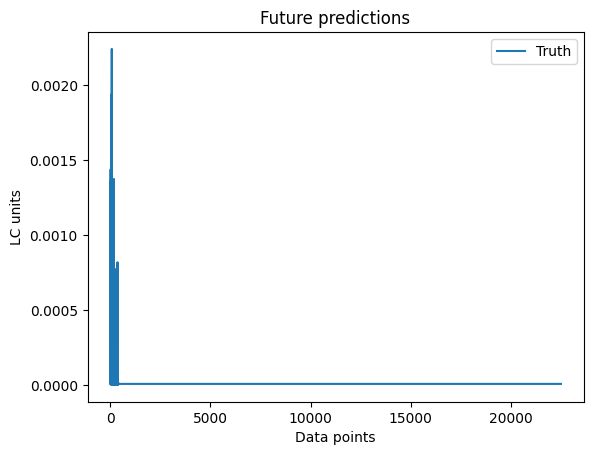

In [59]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [60]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [61]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB4-2***

## Data

### Get data

In [62]:
num = nums[13]

In [63]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

lc = pd.Series(sheet.loc[:,"LC2"]).array

print(lc)

<PandasArray>
[3.47608649213592e-05,  6.5417243805523e-05, 0.000100294726166931,
 0.000140801101694561, 0.000186917964819828, 0.000195873635919464,
 0.000272519526805043, 0.000357340988638686, 0.000425176738414785,
  7.3111231132059e-05,
 ...
              1.6e-06,              1.5e-06,             4.36e-08,
             5.11e-07,             1.04e-06,             2.23e-06,
             4.28e-06,              4.5e-06,             1.72e-06,
             6.26e-06]
Length: 387, dtype: float64


In [64]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[2.527701159493745e-09,  1.45623815228646e-07,  3.57375171233798e-07,
 9.721757123770658e-07, 2.723954366956605e-06,  8.62193337525241e-06,
 1.913420783239417e-05, 1.450179570383625e-05, 2.037529156950768e-05,
 2.338523881917354e-05, 3.086870856350288e-05, 1.271332905616873e-07,
  7.69947106071811e-10, 6.420250286964801e-08,  1.95752107856606e-07,
 5.559354576689657e-07, 3.348787231516326e-06, 8.104950211418327e-06,
 3.000887409143616e-05, 3.785423905355856e-05, 3.949655365431681e-05,
 2.976505311380606e-05, 2.911524643423036e-05, 3.993397695012391e-05,
  4.93144107167609e-05, 6.414893869077787e-05,  8.98133237114962e-07,
 2.570002699542329e-08, 5.280959953779529e-07, 1.369306687593053e-06,
 3.904699497070396e-06, 9.442702321393881e-06, 2.623772343213204e-05,
 9.176741514238529e-06, 2.016541475313716e-05, 8.138486737152562e-05,
 9.399050031788647e-05, 0.0001534413750050589, 0.0001649730984354392,
 0.0001678494591033086, 0.0001125713970395736, 5.538709956454113e-05,
 1.211

In [65]:
len(lc_pred)

77

In [66]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [67]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [68]:
data = [lc_merged, lc]

### Normalize data

In [69]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [70]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(380, 7, 1) (380,)
[[0.015044  ]
 [0.02831165]
 [0.04340613]
 [0.06093671]
 [0.08089543]
 [0.08477132]
 [0.11794257]] 0.1546520921069806
[[0.02831165]
 [0.04340613]
 [0.06093671]
 [0.08089543]
 [0.08477132]
 [0.11794257]
 [0.15465209]] 0.18401043930891148
[[0.04340613]
 [0.06093671]
 [0.08089543]
 [0.08477132]
 [0.11794257]
 [0.15465209]
 [0.18401044]] 0.03164149764104834
[[0.06093671]
 [0.08089543]
 [0.08477132]
 [0.11794257]
 [0.15465209]
 [0.18401044]
 [0.0316415 ]] 0.05709687443137105
[[0.08089543]
 [0.08477132]
 [0.11794257]
 [0.15465209]
 [0.18401044]
 [0.0316415 ]
 [0.05709687]] 0.07037014840651322
[[0.08477132]
 [0.11794257]
 [0.15465209]
 [0.18401044]
 [0.0316415 ]
 [0.05709687]
 [0.07037015]] 0.12064265880713627
[[0.11794257]
 [0.15465209]
 [0.18401044]
 [0.0316415 ]
 [0.05709687]
 [0.07037015]
 [0.12064266]] 0.12169500658806204
[[0.15465209]
 [0.18401044]
 [0.0316415 ]
 [0.05709687]
 [0.07037015]
 [0.12064266]
 [0.12169501]] 0.15370301455637192
[[0.18401044]
 [0.0316415 ]
 [

In [71]:
X[1][-1]

array([0.15465209])

In [72]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

304


In [73]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.015044  ]
 [0.02831165]
 [0.04340613]
 [0.06093671]
 [0.08089543]
 [0.08477132]
 [0.11794257]] 0.1546520921069806
[[0.02831165]
 [0.04340613]
 [0.06093671]
 [0.08089543]
 [0.08477132]
 [0.11794257]
 [0.15465209]] 0.18401043930891148
[[0.04340613]
 [0.06093671]
 [0.08089543]
 [0.08477132]
 [0.11794257]
 [0.15465209]
 [0.18401044]] 0.03164149764104834
[[0.06093671]
 [0.08089543]
 [0.08477132]
 [0.11794257]
 [0.15465209]
 [0.18401044]
 [0.0316415 ]] 0.05709687443137105
[[0.08089543]
 [0.08477132]
 [0.11794257]
 [0.15465209]
 [0.18401044]
 [0.0316415 ]
 [0.05709687]] 0.07037014840651322
[[0.08477132]
 [0.11794257]
 [0.15465209]
 [0.18401044]
 [0.0316415 ]
 [0.05709687]
 [0.07037015]] 0.12064265880713627
[[0.11794257]
 [0.15465209]
 [0.18401044]
 [0.0316415 ]
 [0.05709687]
 [0.07037015]
 [0.12064266]] 0.12169500658806204
[[0.15465209]
 [0.18401044]
 [0.0316415 ]
 [0.05709687]
 [0.07037015]
 [0.12064266]
 [0.12169501]] 0.15370301455637192
[[0.18401044]
 [0.0316415 ]
 [0.05709687]
 [0.070

In [74]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [75]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

304
304
76
76


In [76]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [77]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[12]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

388 0.1399505327350019
389 0.1399595004018741
390 0.13997109711961486
391 0.13998360285730116
392 0.13999834104068243
393 0.140015347318313
394 0.14003295451000697
395 0.14005131542178817
396 0.1400688453391743
397 0.14008379261356851
398 0.14009623120598946
399 0.14010495032433057
400 0.14011058400463328
401 0.14011463965705873
402 0.14011807158779477
403 0.14012169482210113
404 0.14012585938697186
405 0.14013062261627085
406 0.14013621473630367
407 0.14014275892266626
408 0.1401502856748087
409 0.14015879992673974
410 0.14016814687018297
411 0.14017815081258989
412 0.14018861181064524
413 0.1401992287615761
414 0.14020964765457422
415 0.14021946295959453
416 0.1402282959785046
417 0.1402359626686851
418 0.14024253493251337
419 0.14024830201567995
420 0.14025364526613004
421 0.14025888379826967
422 0.14026425873596993
423 0.14026994613193922
424 0.14027606179895913
425 0.14028267376314063
426 0.14028979826442112
427 0.14029739450559675
428 0.1403053708750852
429 0.14031360482802513
43

KeyboardInterrupt: ignored

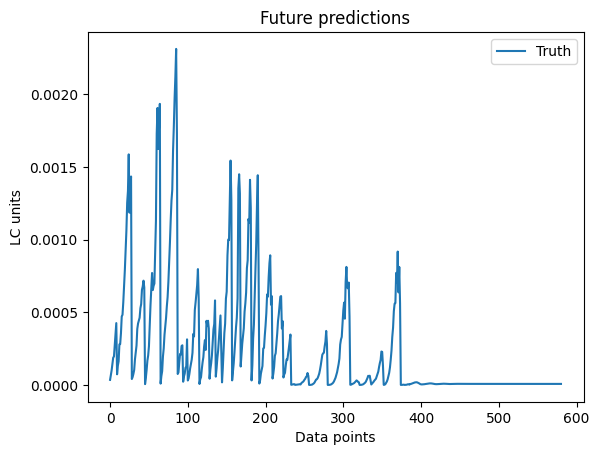

In [78]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [79]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [80]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB5-1-1***

## Data

### Get data

In [81]:
num = nums[14]

In [82]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

lc = pd.Series(sheet.loc[:,"AD1"]).array

print(lc)

<PandasArray>
[ 2.122741395548039e-06,  4.657969395499276e-06, 3.1243873563109784e-06,
 5.1360787318995395e-06,  7.072440868187518e-06, 1.0097471121581329e-05,
 1.2564957612319851e-05,  1.753552272673549e-05, 2.8467417655240515e-05,
 1.1660225918362208e-06,
 ...
 1.7448083881120747e-06,  7.192723607432326e-06, 1.3084234355316426e-06,
  3.412929500800552e-06, 3.2370909223129497e-06, 1.7295150773868313e-06,
  2.855592283208608e-06, 3.4934604481501037e-06, 1.1313069525636538e-05,
 1.1760355485856407e-05]
Length: 388, dtype: float64


In [83]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[7.932759444884141e-07, 4.911696009912703e-07, 8.121895120893896e-07,
 1.643520135985455e-06, 2.416039706076845e-06, 3.031743744941195e-06,
 7.462089342880063e-06,  4.44840952695813e-06, 2.724590331126819e-06,
 2.941342472695396e-06, 3.062647920160089e-06, 3.188100663464866e-06,
 4.702267517586733e-07, 9.108435961024952e-07,  5.53693723759352e-07,
  1.20267088732362e-06, 2.138699528586585e-06, 2.444915253363433e-06,
 1.665856984800484e-06, 2.724859086811193e-06, 2.767985733953537e-06,
 3.235907570342533e-06, 3.469205012152088e-06, 5.087973022455117e-06,
 6.223161562957102e-06, 8.535020242561586e-06, 1.300463918596506e-05,
 2.605057716209558e-06, 3.196528041371494e-06, 1.757371592248091e-06,
 2.653029469001922e-06, 3.415213086555013e-06, 1.168622839031741e-05,
 4.905798505205894e-06, 1.561296357976971e-06, 1.670382516749669e-06,
 1.668342179073079e-06, 1.859407802839996e-06, 2.065409489659942e-06,
  2.94369897346769e-06, 5.927161964791594e-06, 1.583953780937009e-05,
 3.007

In [84]:
len(lc_pred)

78

In [85]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [86]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [87]:
data = [lc_merged, lc]

### Normalize data

In [88]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [89]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(381, 7, 1) (381,)
[[0.00219589]
 [0.00488801]
 [0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]] 0.01856247543701312
[[0.00488801]
 [0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]] 0.03017087957314236
[[0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]] 0.0011799654225009908
[[0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]] 0.013339323383980521
[[0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]] 0.008951301988655225
[[0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]] 0.008832052785548307
[[0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]
 [0.00883205]] 0.008110966474334446
[[0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]
 [0.00883205]
 [0.00811097]] 0.013951358305032335
[[0.03017088]
 [0.0011

In [90]:
X[1][-1]

array([0.01856248])

In [91]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

304


In [92]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.00219589]
 [0.00488801]
 [0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]] 0.01856247543701312
[[0.00488801]
 [0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]] 0.03017087957314236
[[0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]] 0.0011799654225009908
[[0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]] 0.013339323383980521
[[0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]] 0.008951301988655225
[[0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]] 0.008832052785548307
[[0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]
 [0.00883205]] 0.008110966474334446
[[0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]
 [0.00883205]
 [0.00811097]] 0.013951358305032335
[[0.03017088]
 [0.00117997]
 [0.01333932]

In [93]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [94]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

304
304
77
77


In [95]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [98]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[14]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

Streaming output truncated to the last 5000 lines.
22352 0.813935272942693
22353 0.8139980780556682
22354 0.8140826681642677
22355 0.8141656023085699
22356 0.814317013967887
22357 0.8143824176745722
22358 0.8144360297133273
22359 0.814445478887613
22360 0.814470859188553
22361 0.8145860641475549
22362 0.8146255792876429
22363 0.8146262743503241
22364 0.8146264007455881
22365 0.8146277536829627
22366 0.814630228001725
22367 0.8146326791431517
22368 0.8146352154801304
22369 0.8146390723124666
22370 0.8146443633210863
22371 0.8146508331553475
22372 0.8146591772326344
22373 0.8146707897364747
22374 0.8146864716570332
22375 0.8147070372549121
22376 0.8147393086153085
22377 0.8147864796453275
22378 0.8148287365008497
22379 0.8149027741498782
22380 0.8149456304424445
22381 0.8150731181856015
22382 0.8150898379905909
22383 0.8151129717650389
22384 0.8151269355173196
22385 0.8151622597531156
22386 0.8151838381461045
22387 0.8152251693870409
22388 0.8153089339654895
22389 0.8153582303609352
2239

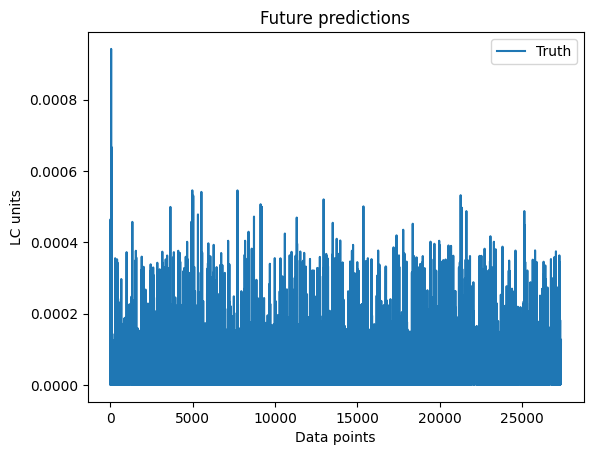

In [99]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [100]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [101]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB5-1-2***

## Data

### Get data

In [102]:
num = nums[15]

In [103]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

lc = pd.Series(sheet.loc[:,"AD2"]).array

print(lc)

<PandasArray>
[ 1.738194213203439e-06,  2.339125259657576e-06, 3.1151210545077848e-06,
  4.286471760512553e-06,  5.860483384430576e-06, 1.0085048389554725e-05,
 1.2507421921750409e-05, 1.4303257187976813e-05, 1.8637909388695425e-05,
 1.2886974789041655e-06,
 ...
  6.720310026480268e-07, 3.4339407441484902e-06,  5.922233788906155e-07,
 2.2186722338810345e-07,  3.894854711385795e-07,  4.327701134729539e-07,
 4.6943521310413423e-07,   1.32652375167509e-06,  5.365370616901601e-06,
  4.167543168434016e-06]
Length: 388, dtype: float64


In [104]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[1.625980132757832e-07,  1.86104927024644e-07, 1.648744074600472e-07,
 2.148056239548168e-07, 3.128031664800801e-07, 5.516193937182834e-07,
   1.2246869118826e-06, 1.719644501463335e-06, 1.106880517909303e-06,
 1.404198542331869e-06, 1.673787210165756e-06, 2.199567461502738e-06,
  2.39306189087074e-07, 2.107365020265206e-07, 1.653102827958719e-07,
 2.166904806699677e-07, 3.218505639779323e-07, 7.587776735817897e-07,
 1.360157398266892e-06, 1.198652853418025e-06, 1.161867089649604e-06,
 1.446955707251618e-06, 1.811233005355462e-06, 2.834512770277797e-06,
 3.680143663586932e-06, 4.574563263304299e-06, 6.608384410355939e-06,
 5.152306243871863e-07, 3.455216415204632e-07, 2.210139911085207e-07,
 3.427421972901357e-07, 6.022954153195315e-07, 1.327344193668978e-06,
 1.857622009993065e-06, 1.064072762346768e-06, 1.179433979814348e-06,
  1.59522210196883e-06, 2.306674787178054e-06, 3.262090103817172e-06,
 4.736675691674463e-06, 6.342837423289893e-06, 1.287899522139924e-05,
 2.248

In [105]:
len(lc_pred)

78

In [106]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [107]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [108]:
data = [lc_merged, lc]

### Normalize data

In [109]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [110]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(381, 7, 1) (381,)
[[0.00161391]
 [0.00221948]
 [0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]] 0.014275987440775843
[[0.00221948]
 [0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]] 0.018644107339714933
[[0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]] 0.001160942770823656
[[0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]] 0.004431012210017652
[[0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]] 0.0032778784065763287
[[0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]] 0.004895156648096411
[[0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]
 [0.00489516]] 0.003399776561422017
[[0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]
 [0.00489516]
 [0.00339978]] 0.006675257916641557
[[0.01864411]
 [0.00

In [111]:
X[1][-1]

array([0.01427599])

In [112]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

304


In [113]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.00161391]
 [0.00221948]
 [0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]] 0.014275987440775843
[[0.00221948]
 [0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]] 0.018644107339714933
[[0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]] 0.001160942770823656
[[0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]] 0.004431012210017652
[[0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]] 0.0032778784065763287
[[0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]] 0.004895156648096411
[[0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]
 [0.00489516]] 0.003399776561422017
[[0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]
 [0.00489516]
 [0.00339978]] 0.006675257916641557
[[0.01864411]
 [0.00116094]
 [0.0044310

In [114]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [115]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

304
304
77
77


In [116]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [117]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[15]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

Streaming output truncated to the last 5000 lines.
1619 0.021381257952032134
1620 0.02138788712794612
1621 0.021395008842080093
1622 0.021402583169435635
1623 0.021410540462272726
1624 0.02141879636768626
1625 0.02142721458698124
1626 0.021435615785992373
1627 0.021443762361957303
1628 0.021451348451353075
1629 0.021457870342362545
1630 0.02146296417434987
1631 0.02146682953274412
1632 0.02147008235418743
1633 0.021473205870722628
1634 0.02147652584129664
1635 0.021480215733151814
1636 0.02148447547800733
1637 0.02148937873220111
1638 0.021494969818593196
1639 0.021501276085689275
1640 0.02150832677010603
1641 0.021516134090904776
1642 0.021524738457389864
1643 0.02153421860542712
1644 0.0215447424086391
1645 0.02155648554047493
1646 0.02156966535470692
1647 0.02158462801411351
1648 0.021601180370214385
1649 0.021616759978075967
1650 0.021626873474576674
1651 0.02162891315923607
1652 0.021629121967950388
1653 0.021629686114553598
1654 0.021631655439565994
1655 0.021634031653408575
1656

KeyboardInterrupt: ignored

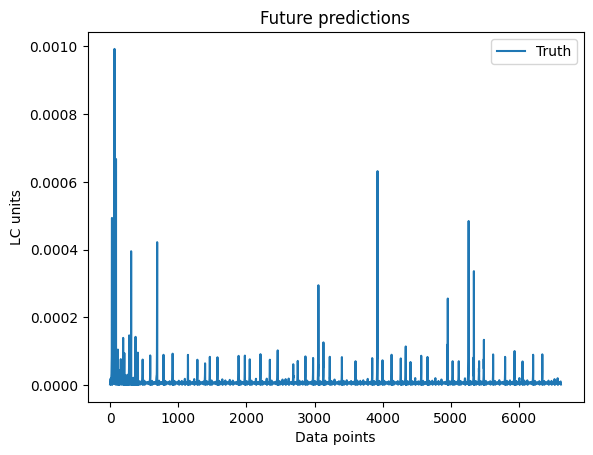

In [118]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [119]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [120]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB5-2-1***

## Data

### Get data

In [121]:
num = nums[16]

In [122]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

lc = pd.Series(sheet.loc[:,"AD1"]).array

print(lc)

<PandasArray>
[ 2.547289674657647e-06,   5.58956327459913e-06, 3.7492648275731743e-06,
  6.163294478279448e-06,  8.486929041825021e-06, 1.2116965345897593e-05,
 1.5077949134783824e-05,  2.104262727208259e-05,  3.416090118628862e-05,
 1.3992271102034647e-06,
 ...
 2.0937700657344897e-06,  8.631268328918793e-06,  1.570108122637971e-06,
  4.095515400960662e-06,   3.88450910677554e-06, 2.0754180928641977e-06,
 3.4267107398503294e-06, 4.1921525377801245e-06, 1.3575683430763845e-05,
 1.4112426583027687e-05]
Length: 388, dtype: float64


In [123]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[5.882757818653772e-07, 5.145080194779439e-06, 1.911632580231526e-06,
 3.945657681470038e-06,   7.1155068326334e-06, 1.064953175955452e-05,
 1.168855214928044e-05, 5.919444902247051e-06, 4.524786618276266e-06,
 4.168151463090908e-06, 4.827779775951058e-06, 6.515265795314917e-06,
 2.738040848271339e-06,  4.26866290581529e-06, 2.047230282187229e-06,
 4.311243174015544e-06, 7.447158623108407e-06,  9.18433397600893e-06,
 7.019416443654336e-06, 4.855008228332736e-06, 4.150779204792343e-06,
 4.650716164178448e-06, 5.152472567715449e-06, 6.569599463546183e-06,
  9.75549210124882e-06, 1.144196085078875e-05, 1.461520241718972e-05,
 6.514727374451468e-06,  7.99341705715051e-06, 3.907523932866752e-06,
 7.339674539252883e-06, 1.093839091481641e-05, 1.170420728158206e-05,
 5.723570211557671e-06, 5.091677849122789e-06, 4.550042376649799e-06,
 5.160332875675522e-06, 7.014666152826976e-06, 8.747709216549993e-06,
 1.079930098057957e-05, 1.491391503805062e-05, 2.771407889667898e-05,
 4.195

In [124]:
len(lc_pred)

78

In [125]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [126]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [127]:
data = [lc_merged, lc]

### Normalize data

In [128]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [129]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(381, 7, 1) (381,)
[[0.00219589]
 [0.00488801]
 [0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]] 0.01856247543701312
[[0.00488801]
 [0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]] 0.030170879573142368
[[0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]] 0.0011799654225009906
[[0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]] 0.013339323383980523
[[0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]] 0.008951301988655227
[[0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]] 0.008832052785548305
[[0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]
 [0.00883205]] 0.008110966474334446
[[0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]
 [0.00883205]
 [0.00811097]] 0.013951358305032335
[[0.03017088]
 [0.001

In [130]:
X[1][-1]

array([0.01856248])

In [131]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

304


In [132]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.00219589]
 [0.00488801]
 [0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]] 0.01856247543701312
[[0.00488801]
 [0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]] 0.030170879573142368
[[0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]] 0.0011799654225009906
[[0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]] 0.013339323383980523
[[0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]] 0.008951301988655227
[[0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]] 0.008832052785548305
[[0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]
 [0.00883205]] 0.008110966474334446
[[0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]
 [0.00883205]
 [0.00811097]] 0.013951358305032335
[[0.03017088]
 [0.00117997]
 [0.01333932

In [133]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [134]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

304
304
77
77


In [135]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [136]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[16]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

Streaming output truncated to the last 5000 lines.
17985 0.7855721701277216
17986 0.7856458603061183
17987 0.7856638433483167
17988 0.7856918242420361
17989 0.7857475512816163
17990 0.7857600268277165
17991 0.7857809059575229
17992 0.7858315055824787
17993 0.7858825544723513
17994 0.7859976589212747
17995 0.7861127693146555
17996 0.7861895933862397
17997 0.7862775481304707
17998 0.7864306498492224
17999 0.7868792784690013
18000 0.7876677846476523
18001 0.7876681356320316
18002 0.787668201712904
18003 0.7876691831288551
18004 0.787672598328754
18005 0.7876768795813403
18006 0.7876822564162465
18007 0.7876880439353042
18008 0.7876956290883752
18009 0.7877059203465249
18010 0.7877208591771703
18011 0.7877391495958361
18012 0.7877633658308694
18013 0.7878012806677359
18014 0.7878469217494055
18015 0.7879104485500645
18016 0.7880049282784964
18017 0.7880415163808718
18018 0.7880801001183497
18019 0.7881574040247867
18020 0.7881721138746796
18021 0.7881890922944874
18022 0.7882096951161655
1

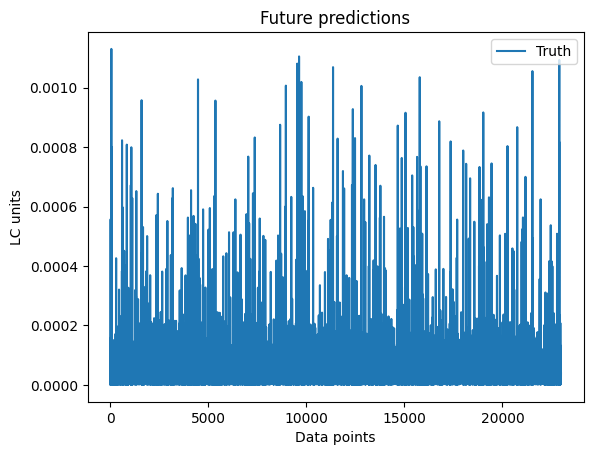

In [137]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [138]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [139]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB5-2-2***

## Data

### Get data

In [25]:
num = nums[17]

In [26]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

lc = pd.Series(sheet.loc[:,"AD2"]).array

print(lc)

<PandasArray>
[2.0858330558441265e-06,  2.806950311589091e-06,  3.738145265409342e-06,
  5.143766112615063e-06,  7.032580061316692e-06,  1.210205806746567e-05,
 1.5008906306100493e-05, 1.7163908625572177e-05,  2.236549126643451e-05,
 1.5464369746849985e-06,
 ...
  8.064372031776321e-07,  4.120728892978189e-06,  7.106680546687385e-07,
 2.6624066806572417e-07,  4.673825653662954e-07,  5.193241361675446e-07,
  5.633222557249611e-07,  1.591828502010108e-06,  6.438444740281921e-06,
  5.001051802120819e-06]
Length: 388, dtype: float64


In [27]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[1.240815777237003e-06, 7.449392569469637e-07, 6.130708811724617e-07,
 8.258869570454408e-07, 1.148077558354998e-06, 1.653125536904554e-06,
 1.717202735562751e-06, 2.288993982801912e-06, 1.690356498329493e-06,
 2.318334964002133e-06, 3.603287041187286e-06, 4.305156380723929e-06,
 1.378896968162735e-06, 1.196727794194885e-06, 6.389865347955492e-07,
  8.81275639130763e-07, 1.234772184943722e-06, 1.384503093504463e-06,
 1.830096834964934e-06, 1.214854705722246e-06, 1.802136239348329e-06,
 2.471485686328379e-06, 3.766574081964791e-06, 4.809892288903939e-06,
  5.91486332268687e-06, 7.948230631882325e-06, 1.052913557941793e-05,
 2.323849457752658e-06, 2.016280177485896e-06, 7.924108444967715e-07,
 1.111930032493547e-06, 1.564961735311954e-06, 1.602905513209407e-06,
 2.185245421060245e-06, 1.774405177457083e-06, 2.418418034721981e-06,
 3.784140290008509e-06, 4.818796242034296e-06, 6.408723038475728e-06,
 8.783906196185853e-06, 1.054188669513678e-05, 1.737941965984646e-05,
 2.447

In [28]:
len(lc_pred)

78

In [29]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [30]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [31]:
data = [lc_merged, lc]

### Normalize data

In [32]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [33]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(381, 7, 1) (381,)
[[0.00161391]
 [0.00221948]
 [0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]] 0.014275987440775843
[[0.00221948]
 [0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]] 0.018644107339714933
[[0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]] 0.001160942770823656
[[0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]] 0.004431012210017652
[[0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]] 0.0032778784065763283
[[0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]] 0.00489515664809641
[[0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]
 [0.00489516]] 0.0033997765614220167
[[0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]
 [0.00489516]
 [0.00339978]] 0.006675257916641556
[[0.01864411]
 [0.00

In [34]:
X[1][-1]

array([0.01427599])

In [35]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

304


In [36]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.00161391]
 [0.00221948]
 [0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]] 0.014275987440775843
[[0.00221948]
 [0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]] 0.018644107339714933
[[0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]] 0.001160942770823656
[[0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]] 0.004431012210017652
[[0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]] 0.0032778784065763283
[[0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]] 0.00489515664809641
[[0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]
 [0.00489516]] 0.0033997765614220167
[[0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]
 [0.00489516]
 [0.00339978]] 0.006675257916641556
[[0.01864411]
 [0.00116094]
 [0.0044310

In [37]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [38]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

304
304
77
77


In [39]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [40]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[17]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

389 0.013655326317703952
390 0.013659291590002908
391 0.013663572965370917
392 0.013666561466508142
393 0.013669335466048437
394 0.013671557385024357
395 0.013673721093156132
396 0.013675721641576388
397 0.013677872325061912
398 0.013680019127960918
399 0.013682230851273857
400 0.013684446375592529
401 0.013686695982315655
402 0.013688947861638667
403 0.013691214715791943
404 0.013693482114505173
405 0.013695755298286826
406 0.013698028148738672
407 0.013700303186525275
408 0.013702577796394621
409 0.01370485318410931
410 0.013707128269189638
411 0.01370940362666363
412 0.013711678810196758
413 0.013713954091273194
414 0.013716229287766623
415 0.013718504522004082
416 0.013720779714632156
417 0.01372305491953841
418 0.013725330107164266
419 0.013727605301611332
420 0.013729880484234966
421 0.013732155671860822
422 0.013734430856758193
423 0.013736706043474553
424 0.013738981226098188
425 0.013741256409631317
426 0.013743531594528688
427 0.013745806778061817
428 0.013748081961594947
429

KeyboardInterrupt: ignored

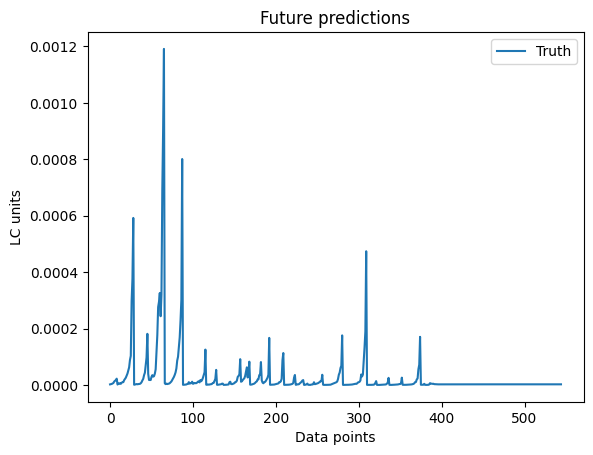

In [41]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [42]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [43]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB5-3-1***

## Data

### Get data

In [44]:
num = nums[18]

In [45]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

lc = pd.Series(sheet.loc[:,"AD1"]).array

print(lc)

<PandasArray>
[ 3.184112093322059e-06,  6.986954093248914e-06, 4.6865810344664676e-06,
  7.704118097849311e-06, 1.0608661302281275e-05, 1.5146206682371991e-05,
  1.884743641847978e-05, 2.6303284090103237e-05, 4.2701126482860776e-05,
 1.7490338877543314e-06,
 ...
  2.617212582168112e-06, 1.0789085411148489e-05, 1.9626351532974636e-06,
  5.119394251200828e-06,  4.855636383469424e-06, 2.5942726160802467e-06,
  4.283388424812912e-06,  5.240190672225156e-06,  1.696960428845481e-05,
 1.7640533228784607e-05]
Length: 388, dtype: float64


In [46]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[3.336877398396609e-06, 4.977520802640356e-06, 6.103247415012447e-06,
 7.661935342184734e-06,  9.62876856647199e-06, 1.139614141720813e-05,
 1.110679204430198e-05,  1.08665180960088e-05, 5.641706138703739e-06,
 5.975341082375962e-06, 8.475637514493428e-06, 8.978940968518145e-06,
 3.658739387901733e-06, 4.238995188643457e-06, 6.099428901507054e-06,
 7.947435733512975e-06, 9.795706318982411e-06,  1.03980037238216e-05,
 1.082934886653675e-05, 5.264536412141751e-06, 5.866170795343351e-06,
 6.227985068107955e-06, 8.526411875209305e-06, 9.747765034262557e-06,
 1.201911527459743e-05, 1.694402817520313e-05, 1.985806011362001e-05,
 5.529170266527217e-06, 6.841535196144832e-06, 7.703251867496874e-06,
 9.786722330318298e-06,    1.151042215497e-05, 1.130407054006355e-05,
 1.128407438955037e-05, 5.616740509140072e-06, 6.074081284168642e-06,
 9.266529559681658e-06, 1.025544952426571e-05, 1.348897785646841e-05,
 1.641793278395198e-05, 2.036814476014115e-05, 2.886811489588581e-05,
 4.059

In [47]:
len(lc_pred)

78

In [48]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [49]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [50]:
data = [lc_merged, lc]

### Normalize data

In [51]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [52]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(381, 7, 1) (381,)
[[0.00219589]
 [0.00488801]
 [0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]] 0.018562475437013115
[[0.00488801]
 [0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]] 0.030170879573142358
[[0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]] 0.0011799654225009906
[[0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]] 0.013339323383980521
[[0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]] 0.008951301988655224
[[0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]] 0.008832052785548303
[[0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]
 [0.00883205]] 0.008110966474334444
[[0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]
 [0.00883205]
 [0.00811097]] 0.013951358305032331
[[0.03017088]
 [0.00

In [53]:
X[1][-1]

array([0.01856248])

In [54]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

304


In [55]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.00219589]
 [0.00488801]
 [0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]] 0.018562475437013115
[[0.00488801]
 [0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]] 0.030170879573142358
[[0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]] 0.0011799654225009906
[[0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]] 0.013339323383980521
[[0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]] 0.008951301988655224
[[0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]] 0.008832052785548303
[[0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]
 [0.00883205]] 0.008110966474334444
[[0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]
 [0.00883205]
 [0.00811097]] 0.013951358305032331
[[0.03017088]
 [0.00117997]
 [0.0133393

In [56]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [57]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

304
304
77
77


In [58]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [59]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[18]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

Streaming output truncated to the last 5000 lines.
9382 0.6498793215774935
9383 0.6499143616725928
9384 0.6499464613349414
9385 0.649974674104335
9386 0.6500451235057266
9387 0.6502379963946009
9388 0.6502628254526212
9389 0.6502746499041973
9390 0.6502904232126024
9391 0.6503063203705391
9392 0.6503171856680933
9393 0.6503290590104666
9394 0.6503435529581406
9395 0.6503593318144635
9396 0.6503753970724869
9397 0.6503954968708353
9398 0.6504198626067886
9399 0.6504498858490774
9400 0.6504868722737523
9401 0.6505361332971301
9402 0.65064049687556
9403 0.650749805973312
9404 0.6508179668895832
9405 0.6509437017235836
9406 0.651099488954635
9407 0.6512092447961845
9408 0.6515882240206633
9409 0.6516521791278432
9410 0.6516838995854709
9411 0.6516864083959103
9412 0.6517052193638687
9413 0.6517173491346352
9414 0.6517310406987985
9415 0.6517455965521389
9416 0.6517643717660416
9417 0.6517847524636476
9418 0.6518086062213865
9419 0.6518394145722436
9420 0.6518798149708186
9421 0.65192976162

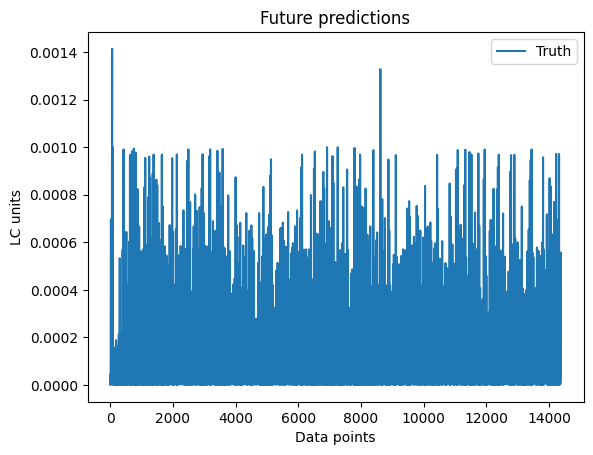

In [60]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [61]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [62]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB5-3-2***

## Data

### Get data

In [63]:
num = nums[19]

In [64]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

lc = pd.Series(sheet.loc[:,"AD2"]).array

print(lc)

<PandasArray>
[2.6072913198051586e-06,  3.508687889486364e-06,  4.672681581761677e-06,
  6.429707640768829e-06,  8.790725076645864e-06, 1.5127572584332086e-05,
 1.8761132882625617e-05,  2.145488578196522e-05,  2.795686408304314e-05,
  1.933046218356248e-06,
 ...
 1.0080465039720401e-06,  5.150911116222735e-06,  8.883350683359231e-07,
  3.328008350821552e-07,  5.842282067078693e-07,  6.491551702094308e-07,
  7.041528196562014e-07,  1.989785627512635e-06,  8.048055925352402e-06,
  6.251314752651024e-06]
Length: 388, dtype: float64


In [65]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[7.926254852463899e-07, 7.443400704687519e-07,  7.92562957485643e-07,
 1.000585029942158e-06, 1.343238182016648e-06, 1.818094460759312e-06,
 2.133312364094309e-06, 2.723451416386524e-06, 2.781316652544774e-06,
  3.43235524269403e-06, 4.675205218518386e-06, 5.395268090069294e-06,
  1.67871144185483e-06, 1.498655137766036e-06, 8.138435987348203e-07,
 1.047229147843609e-06, 1.400012706653797e-06, 1.713361712063488e-06,
 2.226493506896077e-06, 2.175229838030646e-06, 2.904286247940036e-06,
 3.618336222643848e-06, 4.852961410506396e-06,  6.27571080258349e-06,
 7.724618626525626e-06, 1.040480856318027e-05, 1.388962209603051e-05,
 2.031076292041689e-06, 1.879730461951112e-06, 1.002724502541241e-06,
 1.380163098474441e-06, 1.889122131615295e-06, 2.205185865022941e-06,
 2.775446318992181e-06, 2.889803226935328e-06, 3.592034317989601e-06,
 4.993258244212484e-06, 6.113487870607059e-06, 8.207181053876411e-06,
  1.10186156234704e-05, 1.479587626818102e-05, 2.222633702331223e-05,
 2.915

In [66]:
len(lc_pred)

78

In [67]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [68]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [69]:
data = [lc_merged, lc]

### Normalize data

In [70]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [71]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(381, 7, 1) (381,)
[[0.00161391]
 [0.00221948]
 [0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]] 0.014275987440775842
[[0.00221948]
 [0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]] 0.01864410733971493
[[0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]] 0.0011609427708236559
[[0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]] 0.004431012210017652
[[0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]] 0.0032778784065763283
[[0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]] 0.00489515664809641
[[0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]
 [0.00489516]] 0.003399776561422016
[[0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]
 [0.00489516]
 [0.00339978]] 0.006675257916641556
[[0.01864411]
 [0.001

In [72]:
X[1][-1]

array([0.01427599])

In [73]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

304


In [74]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.00161391]
 [0.00221948]
 [0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]] 0.014275987440775842
[[0.00221948]
 [0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]] 0.01864410733971493
[[0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]] 0.0011609427708236559
[[0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]] 0.004431012210017652
[[0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]] 0.0032778784065763283
[[0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]] 0.00489515664809641
[[0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]
 [0.00489516]] 0.003399776561422016
[[0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]
 [0.00489516]
 [0.00339978]] 0.006675257916641556
[[0.01864411]
 [0.00116094]
 [0.00443101

In [75]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [76]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

304
304
77
77


In [77]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [78]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[19]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

389 0.01707031559850648
390 0.017077796190154825
391 0.017087599903665162
392 0.01709893788653417
393 0.017109579110059624
394 0.01712038891206603
395 0.01713208164789094
396 0.0171450062424482
397 0.01715813912857257
398 0.01717082905348789
399 0.017183599462317855
400 0.017196872969965537
401 0.01721041452298223
402 0.017223587608772416
403 0.01723608270082323
404 0.01724802258728587
405 0.017259363167671748
406 0.017269782434472202
407 0.017279048606600466
408 0.017287271096269163
409 0.0172947484878604
410 0.017301708601156773
411 0.017308248231405653
412 0.017314587904696876
413 0.017320982755212665
414 0.01732760245237287
415 0.01733447561342828
416 0.017341587379509207
417 0.01734898409164444
418 0.01735670628737708
419 0.0173647418522377
420 0.017373038621248185
421 0.01738155966073819
422 0.01739029395490789
423 0.017399218187951107
424 0.017408285983823504
425 0.017417449376684005
426 0.017426678156756595
427 0.017435950583479923
428 0.01744523761668816
429 0.0174545069147497

KeyboardInterrupt: ignored

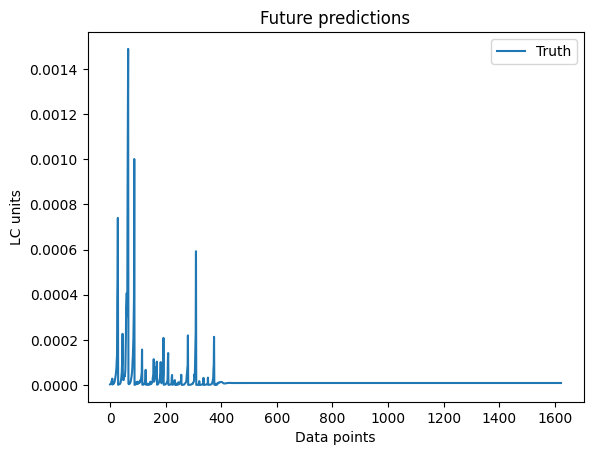

In [79]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [80]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [81]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB5-4-1***

## Data

### Get data

In [82]:
num = nums[20]

In [83]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

lc = pd.Series(sheet.loc[:,"AD1"]).array

print(lc)

<PandasArray>
[ 4.245482791096078e-06,  9.315938790998552e-06,  6.248774712621957e-06,
 1.0272157463799079e-05, 1.4144881736375035e-05, 2.0194942243162658e-05,
 2.5129915224639703e-05,  3.507104545347098e-05,  5.693483531048103e-05,
 2.3320451836724416e-06,
 ...
 3.4896167762241494e-06, 1.4385447214864652e-05,  2.616846871063285e-06,
  6.825859001601104e-06,  6.474181844625899e-06, 3.4590301547736627e-06,
  5.711184566417216e-06, 6.9869208963002075e-06, 2.2626139051273076e-05,
 2.3520710971712813e-05]
Length: 388, dtype: float64


In [84]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[1.767928665685758e-06, 7.940017894725315e-06, 2.312410288141109e-06,
 4.534755589702399e-06, 8.060338586801663e-06, 1.313012489845278e-05,
 1.833876922319178e-05, 9.392353604198433e-06, 6.842399670858867e-06,
 7.625878879480297e-06, 7.125881893443875e-06, 7.551911039627157e-06,
 1.200905899167992e-06,  4.51834512205096e-06, 1.680043965279765e-06,
 3.475638322925079e-06,    6.367002697516e-06, 9.761980436451267e-06,
 5.291821253194939e-06, 4.827459179068683e-06, 5.736194907512981e-06,
 6.705291980324546e-06, 7.067204478516942e-06, 8.946595698944293e-06,
 1.109102959162556e-05, 1.552422509121243e-05, 2.373843562963884e-05,
 4.391566562844673e-06, 1.380549474561121e-05, 5.466260972752934e-06,
  1.02485701063415e-05, 1.668093136686366e-05, 2.021325235546101e-05,
 1.304576016991632e-05, 8.435285963059869e-06, 9.194905032927636e-06,
 9.540081009618007e-06, 8.847062417771667e-06, 9.281974598707166e-06,
  1.32996774482308e-05, 2.127156949427444e-05, 4.047589027322829e-05,
 5.533

In [85]:
len(lc_pred)

78

In [86]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [87]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [88]:
data = [lc_merged, lc]

### Normalize data

In [89]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [90]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(381, 7, 1) (381,)
[[0.00219589]
 [0.00488801]
 [0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]] 0.01856247543701312
[[0.00488801]
 [0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]] 0.03017087957314236
[[0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]] 0.0011799654225009908
[[0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]] 0.013339323383980521
[[0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]] 0.008951301988655225
[[0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]] 0.008832052785548307
[[0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]
 [0.00883205]] 0.008110966474334446
[[0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]
 [0.00883205]
 [0.00811097]] 0.013951358305032335
[[0.03017088]
 [0.0011

In [91]:
X[1][-1]

array([0.01856248])

In [92]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

304


In [93]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.00219589]
 [0.00488801]
 [0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]] 0.01856247543701312
[[0.00488801]
 [0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]] 0.03017087957314236
[[0.00325952]
 [0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]] 0.0011799654225009908
[[0.0053957 ]
 [0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]] 0.013339323383980521
[[0.0074519 ]
 [0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]] 0.008951301988655225
[[0.01066413]
 [0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]] 0.008832052785548307
[[0.01328431]
 [0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]
 [0.00883205]] 0.008110966474334446
[[0.01856248]
 [0.03017088]
 [0.00117997]
 [0.01333932]
 [0.0089513 ]
 [0.00883205]
 [0.00811097]] 0.013951358305032335
[[0.03017088]
 [0.00117997]
 [0.01333932]

In [94]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [95]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

304
304
77
77


In [96]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [97]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[20]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

389 0.02589857551333767
390 0.025919362283957123
391 0.025940011326155907
392 0.025960291902947172
393 0.025983903638688896
394 0.02601564701558305
395 0.026052566304997124
396 0.02609302106588944
397 0.02614039549166551
398 0.02620107908819551
399 0.026286881065743326
400 0.026422558437615914
401 0.026516895397207516
402 0.02664568189879861
403 0.026896914312373663
404 0.027097832169374267
405 0.027630285175973365
406 0.027636139394644085
407 0.027636249042017932
408 0.02764149133719189
409 0.027648275017611065
410 0.027653239694984275
411 0.027657548216950142
412 0.027662284242353105
413 0.027668962184008758
414 0.027676091636123654
415 0.027683507501762558
416 0.027691620932102576
417 0.02770012465117548
418 0.02770851481983487
419 0.027716915471330192
420 0.02772546628676724
421 0.027733990508579207
422 0.027742426067390677
423 0.02775088889921977
424 0.027759386751142354
425 0.0277678516166016
426 0.02777630075053099
427 0.027784772537244914
428 0.027793247504461813
429 0.02780170

KeyboardInterrupt: ignored

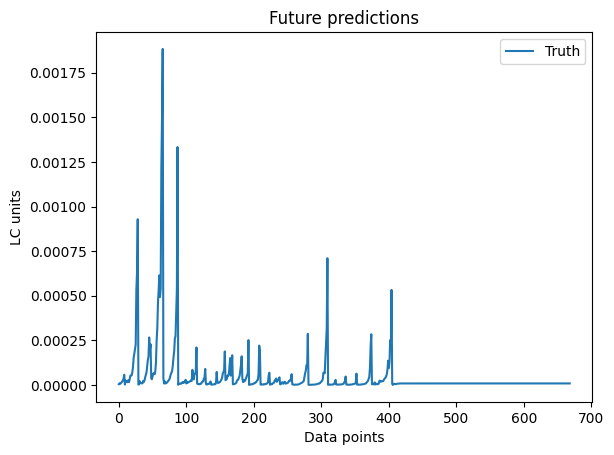

In [98]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [99]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [100]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"

# ***DB5-4-2***

## Data

### Get data

In [101]:
num = nums[21]

In [102]:
book = pd.ExcelFile('Data for ML TT-DB'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

lc = pd.Series(sheet.loc[:,"AD2"]).array

print(lc)

<PandasArray>
[ 3.476388426406878e-06,  4.678250519315152e-06, 6.2302421090155696e-06,
  8.572943521025106e-06, 1.1720966768861153e-05,  2.017009677910945e-05,
 2.5014843843500817e-05, 2.8606514375953625e-05,  3.727581877739085e-05,
  2.577394957808331e-06,
 ...
 1.3440620052960536e-06, 6.8678814882969804e-06,  1.184446757781231e-06,
  4.437344467762069e-07,   7.78970942277159e-07,  8.655402269459078e-07,
  9.388704262082685e-07,   2.65304750335018e-06, 1.0730741233803202e-05,
  8.335086336868031e-06]
Length: 388, dtype: float64


In [103]:
book = pd.ExcelFile('preds_'+num+'.xlsx')
sheet = pd.read_excel(book, 'Sheet1', header = None)

lc_pred = pd.Series(sheet.iloc[:,0]).array

print(lc_pred)

<PandasArray>
[8.028588354136446e-07, 6.184347398630052e-07, 8.034245979615662e-07,
 1.497385710536037e-06, 2.537218051656964e-06, 3.776355697482359e-06,
 9.287226021115202e-06, 1.305475598201156e-05, 6.629965810134308e-06,
 6.093392585171387e-06, 7.965782060637139e-06, 1.002129829430487e-05,
 1.203110400638252e-06, 1.071610427061387e-06, 1.015026100503746e-06,
 2.041689413090353e-06, 3.332029109515133e-06, 6.924231001903536e-06,
 1.086047996068373e-05, 6.748224222974386e-06, 7.307911346288165e-06,
 6.617126018682029e-06, 8.499895557179116e-06, 1.205899025080726e-05,
 1.633684587432072e-05, 1.971729216165841e-05, 2.127337029378396e-05,
 3.022372538907803e-06, 1.728472284412419e-06, 1.368695961900812e-06,
 2.376487827859819e-06, 3.656051603684318e-06, 8.745935701881535e-06,
 1.168160906672711e-05, 6.311893230304122e-06, 5.807884008390829e-06,
 8.503436220053118e-06, 1.140798212873051e-05, 1.593928209331352e-05,
 2.103348560922313e-05, 2.022836088144686e-05, 3.609469786169939e-05,
 5.668

In [104]:
len(lc_pred)

78

In [105]:
lc = np.array(lc)
lc_pred = np.array(lc_pred)

In [106]:
lc_merged = np.append(lc[:len(lc)-len(lc_pred)], (lc_pred))

In [107]:
data = [lc_merged, lc]

### Normalize data

In [108]:
# fit scaler on data and apply transform
data_norm = []
scaler.fit(lc.reshape(-1,1))
for item in data:
  data_norm.append(scaler.transform(item.reshape(-1,1)).T[0])

### Prepare data

In [109]:
X, y = process_data(data_norm, n_steps)
for i in range(len(X)):
	print(X[i], y[i])

(381, 7, 1) (381,)
[[0.00161391]
 [0.00221948]
 [0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]] 0.014275987440775843
[[0.00221948]
 [0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]] 0.018644107339714933
[[0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]] 0.001160942770823656
[[0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]] 0.004431012210017652
[[0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]] 0.0032778784065763287
[[0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]] 0.004895156648096411
[[0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]
 [0.00489516]] 0.003399776561422017
[[0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]
 [0.00489516]
 [0.00339978]] 0.006675257916641557
[[0.01864411]
 [0.00

In [110]:
X[1][-1]

array([0.01427599])

In [111]:
split_idx = 0
for i in range(len(X)):
  if (X[i+1][-1] != y[i]):
    split_idx = i + 1
    print(split_idx)
    break

304


In [112]:
for i in range(len(X[:split_idx])):
	print(X[i], y[i])

[[0.00161391]
 [0.00221948]
 [0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]] 0.014275987440775843
[[0.00221948]
 [0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]] 0.018644107339714933
[[0.00300147]
 [0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]] 0.001160942770823656
[[0.00418186]
 [0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]] 0.004431012210017652
[[0.00576803]
 [0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]] 0.0032778784065763287
[[0.01002521]
 [0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]] 0.004895156648096411
[[0.01246629]
 [0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]
 [0.00489516]] 0.003399776561422017
[[0.01427599]
 [0.01864411]
 [0.00116094]
 [0.00443101]
 [0.00327788]
 [0.00489516]
 [0.00339978]] 0.006675257916641557
[[0.01864411]
 [0.00116094]
 [0.0044310

In [113]:
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

In [114]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

304
304
77
77


In [115]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

## Future Prediction

In [116]:
sum_lc = np.sum(lc)

In [ ]:
sum_lc = np.sum(lc)
future_preds = lc
temp_arr = y[len(y)-7:]
model = models[21]
n_features = X_train.shape[2]

while sum_lc < 1:
  temp_arr_1 = temp_arr.reshape((1, n_steps, n_features))
  temp_arr = np.append(temp_arr, model.predict(temp_arr_1, verbose=0)[0])
  future_preds = np.append(future_preds, scaler.inverse_transform(model.predict(temp_arr_1, verbose=0)[0].reshape(-1,1)).T[0])
  sum_lc = np.sum(future_preds)
  temp_arr = temp_arr[1:]
  print(len(future_preds), sum_lc)

print(len(future_preds))

Streaming output truncated to the last 5000 lines.
12333 0.7395361494974735
12334 0.739541993196019
12335 0.7395503728427342
12336 0.7395615487209055
12337 0.7395747307388432
12338 0.7395917166492494
12339 0.7396121912012517
12340 0.7396390018044825
12341 0.7396768300247116
12342 0.7397282458847825
12343 0.7397937882857717
12344 0.7399386933181289
12345 0.7399708345334715
12346 0.73999207515468
12347 0.7400148679686593
12348 0.7400506179025454
12349 0.740089288554975
12350 0.7401526229938666
12351 0.7403074875752849
12352 0.7403349324965005
12353 0.7403431716462932
12354 0.7403538096010946
12355 0.7403613717494066
12356 0.7403730516076961
12357 0.740379300398365
12358 0.7403854586829424
12359 0.7403899849906905
12360 0.7403943456489854
12361 0.7403975156968612
12362 0.7404012273713418
12363 0.7404047928631938
12364 0.740408786456703
12365 0.7404132533176038
12366 0.7404183961276998
12367 0.7404242003991952
12368 0.7404308960227921
12369 0.7404385660499087
12370 0.7404475337486132
12371

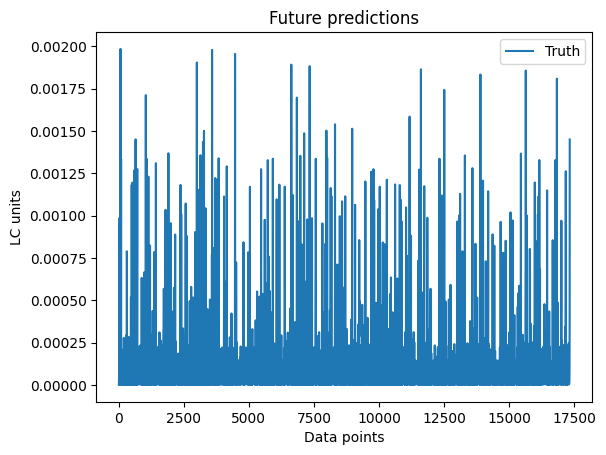

In [ ]:
plt.title('Future predictions')
plt.plot(future_preds)
plt.xlabel('Data points')
plt.ylabel('LC units')
plt.legend(['Truth', 'Prediction'])
plt.show()

In [ ]:
workbook = xlsxwriter.Workbook('Future_Preditcions_db'+num+'.xlsx')
worksheet = workbook.add_worksheet()

row = 0
column = 0

for item in future_preds:
  worksheet.write(row, column, item)
  row += 1

workbook.close()


In [ ]:
!cp "/content/Future_Preditcions_db"$num".xlsx" "/content/drive/My Drive/University/Battery Life Predictor/Trained models/Future forecast/"